# Part 1: Full Bayesian Inference

#### Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below:

1. Generate 50 2D-data points using the following function: $y = \sin(x^2+1)$
2. Add Gaussian random noise to the data
3. Show the original curve line and the noisy data.

[0, 1, 0.75, 1.1]

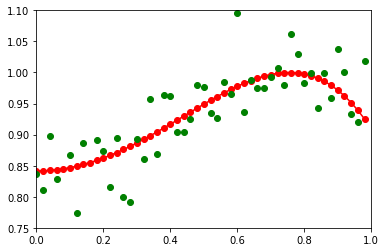

In [387]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import random
import math

# Define the sin function that returns the original data
def sin_distribution():
    # create x coordinates in interval [0,1), with increment 0.02
    x = np.arange(0,1,0.02);
    # create y coordinates according to given function
    y = np.sin(np.power(x,2) + 1)
    return x,y

# Define a function that adds noise to y-values of our original function
def add_noise(y_curve, mu, sigma):
    # Create a normal distribution of noisy values corresponding to y values
    noise = np.random.normal(mu, sigma, len(y_curve))
    # Create new y values by adding noise 
    y_noise = y_curve + noise
    return y_noise

# Set constant variables:
# sigma: the sigma value we use for the Gaussian distribution
sigma = 0.05
# x: the NX1 vector of original x-values
x = sin_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = sin_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(y, 0, sigma)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
plt.plot(x, sin_distribution()[1], "ro")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])

4. Compute w based on the full Bayesian inference (by using basis functions like discussed in class).
5. Display the estimated values of w.


In [194]:
# Set constant variables:
# x: the NX1 vector of original x-values
x = sin_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = sin_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(y, 0, 0.04)

# Generate our Mx1 array of mu values based on M
def mu(M,x_):
    return np.arange(x_[0], x_[N-1], (x_[N-1]-x_[0])/M)

def gaussian_m(x_n, m, s,M):
    # returns phi_m(x_n) for a particular input x_n and a particular m
    diffSq = np.power(x_n - mu(M,x_n)[m], 2)
    return np.exp((-diffSq)/(2*s))

# Create NxM array of big Phi (defined by gaussian basis)
def PhiMat_Gaussian(x,N, M, s):
    # s = (x[N-1]-x[0])/M
    result = np.zeros(N)
    # For each row, take gaussian_m of that row
    for i in range(M):
        newrow = gaussian_m(x,i,s,M)
        result = np.vstack([result, newrow])
    result = np.delete(result, 0, 0)
    return(np.transpose(result))

def S_Cov(a, b, X):
    if len(X.shape) == 1:
        N = 1
        M = 0
    else:
        N = X.shape[0]
        M = X.shape[1]
    aMat = np.diag(np.full(M, a))
    return np.linalg.inv(aMat + b*np.dot(np.transpose(X), X))

def m_func(b, S, X, t):
    return (b*np.dot(S, np.dot(np.transpose(X),t)))

def y_gaussian(x,s,M, mbar):
    x_local = x
    # Create the y_bar vector and add in the respective w_i terms
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += mbar[i]*(gaussian_m(x_local,i,s,M))
    return y_bar

alpha = 1
beta = 1000000

Xmat = PhiMat_Gaussian(x,N, 15, 0.5)
SMat = S_Cov(alpha, beta, Xmat)
m_bar = m_func(beta, SMat, Xmat, t_bar)

for i,m in enumerate(reversed(m_bar)):
    print("m_" + str(i) + " = " + str(round(m, 3)))

m_0 = -6.802
m_1 = -0.73
m_2 = 2.905
m_3 = 4.506
m_4 = 4.515
m_5 = 3.386
m_6 = 1.564
m_7 = -0.527
m_8 = -2.489
m_9 = -3.949
m_10 = -4.559
m_11 = -3.994
m_12 = -1.949
m_13 = 1.851
m_14 = 7.642


6. Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.


m_0 = 2.563
m_1 = -5.358
m_2 = 9.934
m_3 = -13.509
m_4 = 17.852
m_5 = -21.242
m_6 = 26.126
m_7 = -30.064
m_8 = 34.816
m_9 = -38.155
m_10 = 42.356
m_11 = -44.43
m_12 = 45.569
m_13 = -42.902
m_14 = 38.673
m_15 = -31.286
m_16 = 23.59
m_17 = -13.606
m_18 = 3.778
m_19 = 7.05
m_20 = -15.64
m_21 = 23.555
m_22 = -28.55
m_23 = 32.846
m_24 = -35.335
m_25 = 39.522
m_26 = -43.881
m_27 = 50.108
m_28 = -55.101
m_29 = 59.419
m_30 = -60.145
m_31 = 59.048
m_32 = -53.468
m_33 = 45.115
m_34 = -33.167
m_35 = 22.158
m_36 = -12.406
m_37 = 6.828
m_38 = -3.099
m_39 = 1.964
m_40 = 0.011
m_41 = -2.329
m_42 = 6.922
m_43 = -10.971
m_44 = 15.03
m_45 = -16.118
m_46 = 15.313
m_47 = -11.008
m_48 = 6.257
m_49 = -1.274


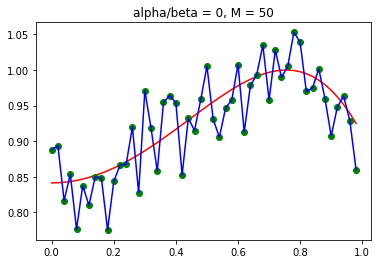

In [221]:
alpha_ = 0
beta_ = 1000000

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.0008)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)
for i,m in enumerate(reversed(m_bar_)):
    print("m_" + str(i) + " = " + str(round(m, 3)))

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("alpha/beta = 0, M = 50")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.0008, 50, m_bar_), "b")

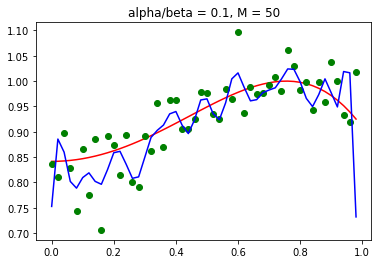

In [400]:
alpha_ = 1
beta_ = 10

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.0008)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("alpha/beta = 0.1, M = 50")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.0008, 50, m_bar_), "b")

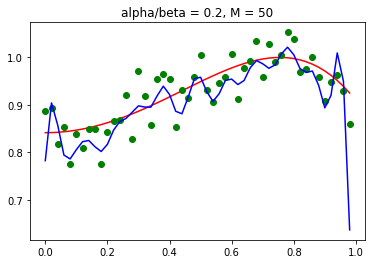

In [220]:
alpha_ = 1
beta_ = 5

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.0008)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("alpha/beta = 0.2, M = 50")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.0008, 50, m_bar_), "b")

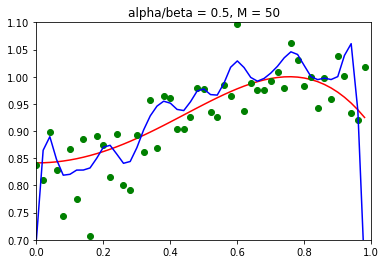

In [401]:
alpha_ = 1
beta_ = 2

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.0009)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("alpha/beta = 0.5, M = 50")
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.7,1.1])
plt.plot(x, y_gaussian(x, 0.001, 50, m_bar_), "b")

We notice that for full bayesian, we use the equation
$$\overline{m}_n = \beta \mathbb{S}_N(\mathbb{X}^T\overline{t}) = \beta(\alpha\mathbb{I} + \beta\mathbb{X}^T\mathbb{X})^{-1}(\mathbb{X}^T\overline{t}) = \left(\frac{\alpha}{\beta}+\mathbb{X}^T\mathbb{X}\right)^{-1}(\mathbb{X}^T\overline{t})$$

Hence, the way we generate the vector of coefficients $\overline{m}$ (or $\overline{w}$) is actually the same as when we implement MAP with a regularisation constant. That is, the closer the constant $\frac{\alpha}{\beta}$ is to $0$, the closer it is to our least squares method (but with a basis function). Hence, we see that overfitting happens when $M=50$ and when $\alpha = 0$, and as we increase the value of $\frac{\alpha}{\beta}$, the curve becomes more and more smooth due to regularisation. As explained below, for values of $\frac{\alpha}{\beta}$ that are not as small, we get a graph that is smoother due to regularisation.


7. Show your best fitting:

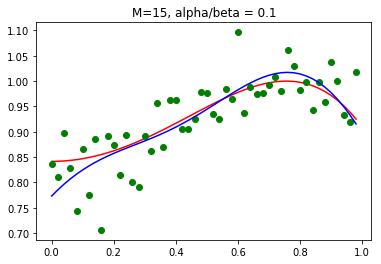

In [410]:
alpha_ = 1
beta_ = 10

Xmat_ = PhiMat_Gaussian(x,N, 15, 0.15)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("M=15, alpha/beta = 0.1")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.15, 15, m_bar_), "b")

8. Increase the value of M, and discuss how it affects the prediction (curve fitting) and the uncertainty of the prediction.


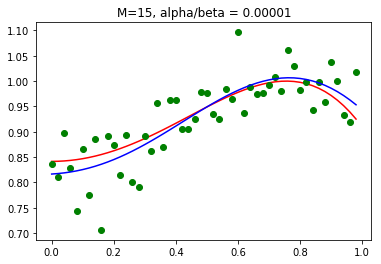

In [408]:
alpha_ = 1
beta_ = 100000

Xmat_ = PhiMat_Gaussian(x,N, 15, 0.5)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("M=15, alpha/beta = 0.00001")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.5, 15, m_bar_), "b")

(50, 15)


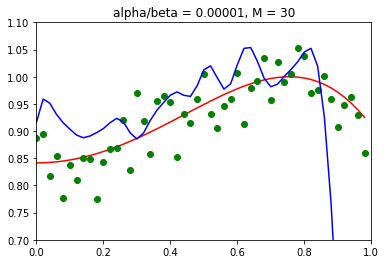

In [383]:
alpha_ = 1
beta_ = 100000

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.0009)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("alpha/beta = 0.00001, M = 30")
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.7,1.1])
plt.plot(x, y_gaussian(x, 0.003, 30, m_bar_), "b")

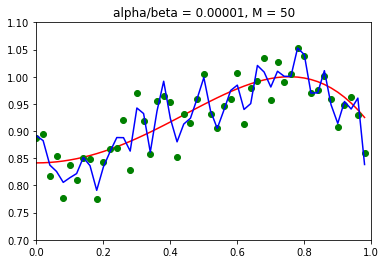

In [335]:
alpha_ = 1
beta_ = 10000

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.0008)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("alpha/beta = 0.00001, M = 50")
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.7,1.1])
plt.plot(x, y_gaussian(x, 0.0008, 50, m_bar_), "b")

For a very small value of $\frac{\alpha}{\beta}$, a larger $M$ value leads to overfitting as discussed above and as seen in the above graphs.

P(w|t): 0.0072780168


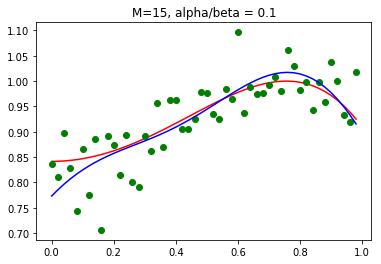

In [397]:
def prob(m, S):
    prob = np.power(2*math.pi, (-m/2))*np.power(np.linalg.det(S), -0.5)
    return prob

alpha_ = 1
beta_ = 10

Xmat_ = PhiMat_Gaussian(x,N, 15, 0.15)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("M=15, alpha/beta = 0.1")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.15, 15, m_bar_), "b")
print("P(w|t): " + str(round(prob(15, SMat_), 10)))

P(w|t): 2.41e-08


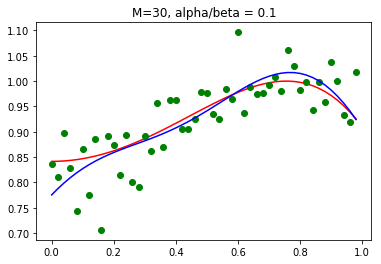

In [399]:
alpha_ = 1
beta_ = 10

Xmat_ = PhiMat_Gaussian(x,N, 30, 0.15)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("M=30, alpha/beta = 0.1")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.15, 30, m_bar_), "b")
print("P(w|t): " + str(round(prob(30, SMat_), 10)))

P(w|t): 0.0


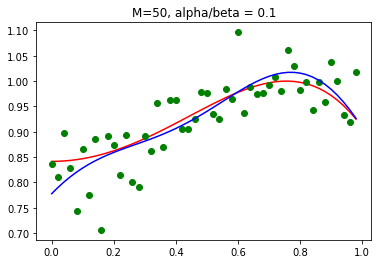

In [398]:
alpha_ = 1
beta_ = 10

Xmat_ = PhiMat_Gaussian(x,N, 50, 0.15)
SMat_ = S_Cov(alpha_, beta_, Xmat_)
m_bar_ = m_func(beta_, SMat_, Xmat_, t_bar)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.title("M=50, alpha/beta = 0.1")
plt.plot(x, t_bar, "go")
plt.plot(x, y_gaussian(x, 0.15, 50, m_bar_), "b")
print("P(w|t): " + str(round(prob(50, SMat_), 10)))

For a reasonable value of $\frac{\alpha}{\beta} = 0.1$ above, we notice that $M$ does not really affect the prediction at all - there are very minor changes when we increase $M$. This is the advantage of implementing Full Bayesian to help solve our model selection problem.

As $M$ increases, we notice that $P(w|t)$ decreases. This means that since the peak of our gaussian distribution is decreasing, the uncertainty is increasing (since the spread is getting wider and wider). This is possibly because as we increase the number of coefficients, the uncertainty for each coefficient adds up to result in the overall model uncertainty increasing.

9. Explain how useful $p(w|t)$ is for the training and testing stages.

$p(w|t) = G(\overline{w};\overline{m}_N, \mathbb{S}_N)$ is useful for the training stage since it gives us information about both the best fit for the curve, as well as the uncertainty of the predicted model. Since $\overline{m}_n$ is the most probable value of $\overline{w}$, we can use it directly as the desired values for $\overline{w}$, moreover, we know the values in the covariance matrix $\mathbb{S}_N$ correspond to the uncertainty of our model, so we also know how confident we can be in our model overall.

However, $p(w|t)$ only gives us how probable our model is with respect to the training data. It does not directly give us any probability of new data we want to predict in the testing stage. We will see later in predictive distributions that we need to use $p(w|t)$ to calculate predictions for $x_*$ given $t_*$, but $p(w|t)$ does not give us any direct information about predictions.

# Part 2: Sequential Bayesian Learning

1. Generate 50 2D-data points using the following function:  𝑦=sin(𝑥2+1) 
2. Add Gaussian random noise to the data.
3. Fit the generated noisy data sequentially (5 data for each sequence).
4. Show your best result for each sequence. The below examples are only some of them, but in your submission, you have to show all.

[0, 1, 0.75, 1.1]

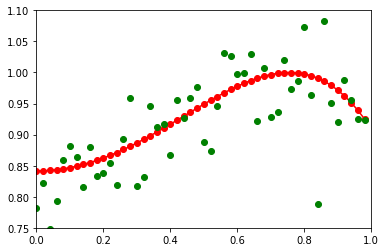

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# Define the sin function that returns the original data
def sin_distribution():
    # create x coordinates in interval [0,1), with increment 0.02
    x = np.arange(0,1,0.02);
    # create y coordinates according to given function
    y = np.sin(np.power(x,2) + 1)
    return x,y

# Define a function that adds noise to y-values of our original function
def add_noise(y_curve, mu, sigma):
    # Create a normal distribution of noisy values corresponding to y values
    noise = np.random.normal(mu, sigma, len(y_curve))
    # Create new y values by adding noise 
    y_noise = y_curve + noise
    return y_noise

# Set constant variables:
# sigma: the sigma value we use for the Gaussian distribution
sigma = 0.05
# x: the NX1 vector of original x-values
x = sin_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = sin_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(y, 0, sigma)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
plt.plot(x, sin_distribution()[1], "ro")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])

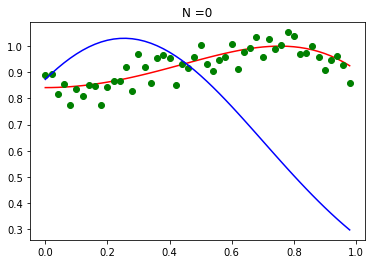

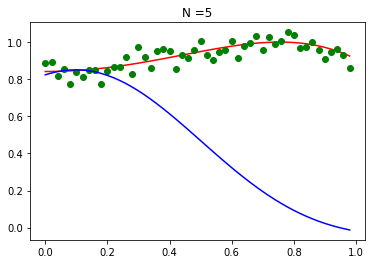

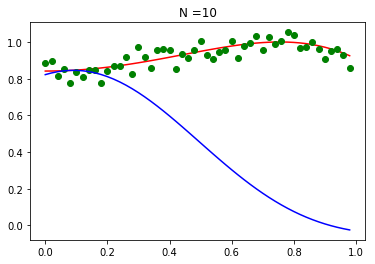

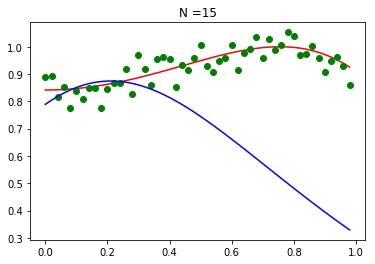

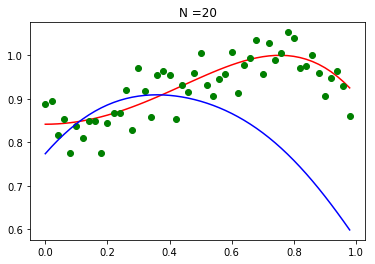

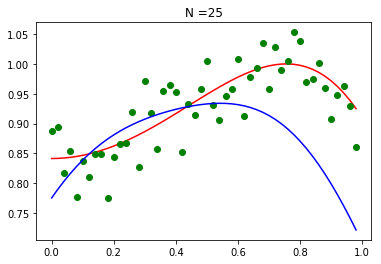

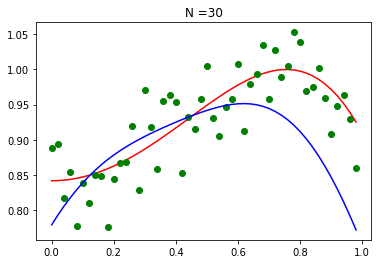

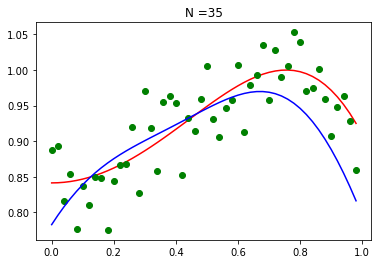

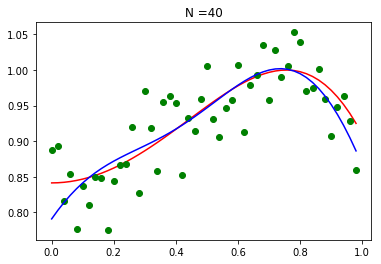

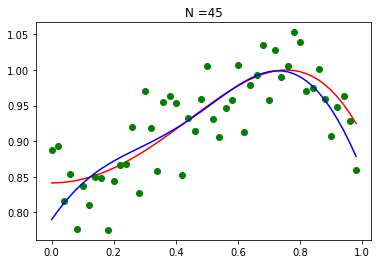

In [362]:
# Generate our Mx1 array of mu values based on M
def mu(M,x, N):
    return np.arange(x[0], x[N-1], (x[N-1]-x[0])/M)

def gaussian_m(x_n, m, s,M,N):
    # returns phi_m(x_n) for a particular input x_n and a particular m
    diffSq = np.power(x_n - mu(M,x_n,N)[m], 2)
    return np.exp((-diffSq)/(2*s))

# Create NxM array of big Phi (defined by gaussian basis)
def PhiMat_Gaussian(x,N, M, s):
    result = np.zeros(N)
    # For each row, take gaussian_m of that row
    for i in range(M):
        newrow = gaussian_m(x,i,s,M,N)
        result = np.vstack([result, newrow])
    result = np.delete(result, 0, 0)
    return(np.transpose(result))

# Use the same parameters as in Full Bayesian
# alpha = 1
# beta = 10000000

alpha = 1
beta = 10
M_new = 15

Xmat = PhiMat_Gaussian(x,N, M_new, 0.15)

def y_gaussian(x,s,M, mbar):
    x_local = x
    # Create the y_bar vector and add in the respective w_i terms
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += mbar[i]*(gaussian_m(x_local,i,s,M,N))
    return y_bar


def update(m):
    # Initialise Sn and mn
    Sn_inv = np.diag(np.full(m, round(1/alpha, 10)))
    mn = np.zeros(m)
    for i in range(50):
        Xrow = np.reshape(Xmat[i], (1,m))
        Sn_inv_new = Sn_inv + beta*(np.matmul(np.transpose(Xrow),Xrow))
        # print(Sn_inv_new.shape)
        mn_new = np.dot(np.linalg.inv(Sn_inv_new), (np.dot(Sn_inv, mn)+beta*np.dot(np.transpose(Xmat[i]), t_bar[i])))
        mn = mn_new 
        Sn_inv = Sn_inv_new
        if i % 5 ==0:
            plt.figure()
            plt.title("N =" + str(i))
            # Actual curve plotted in red line
            plt.plot(x, sin_distribution()[1], "r")
            # Noisy values plotted in green points
            plt.plot(x, t_bar, "go")
            plt.plot(x, y_gaussian(x, 0.15, m, mn), "b")
    plt.show()

update(M_new)



5. Discuss how to set M and the basis function's parameters in sequential learning.


The issue with setting $M$ is that we do not know the range of the entire dataset since we are constantly adding new data points. If we do not set a high enough $M$, the gaussian basis functions may not cover the range of the entire dataset as we keep on adding new points that are outside the range of the original dataset.

In that case, it is beneficial to set $M$ slightly higher than expected (given the first version of the dataset) so that it is tolerant to a larger range of data should we choose to add more points whose range we do not know. However, it shouldn't be too high as well since as we have seen above, uncertainty increases with increasing $M$, and there is more risk of overfitting as well for low $\frac{\alpha}{\beta}$.

The parameters of the basis function, $s$, should be calculated as per normal based on the range of the dataset and the size of $M$ at every iteration, as in MAP with basis functions.

# Part 3: Predictive Distribution

1. Generate 50 2D-data points using the following function: $y = \sin(x^2+1)$
2. Add Gaussian random noise to the data
3. Show the original curve line and the noisy data.

[0, 1, 0.75, 1.1]

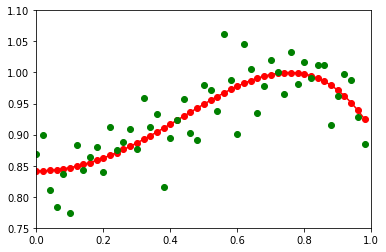

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# Define the sin function that returns the original data
def sin_distribution():
    # create x coordinates in interval [0,1), with increment 0.02
    x = np.arange(0,1,0.02);
    # create y coordinates according to given function
    y = np.sin(np.power(x,2) + 1)
    return x,y

# Define a function that adds noise to y-values of our original function
def add_noise(y_curve, mu, sigma):
    # Create a normal distribution of noisy values corresponding to y values
    noise = np.random.normal(mu, sigma, len(y_curve))
    # Create new y values by adding noise 
    y_noise = y_curve + noise
    return y_noise

# Set constant variables:
# sigma: the sigma value we use for the Gaussian distribution
sigma = 0.05
# x: the NX1 vector of original x-values
x = sin_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = sin_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(y, 0, sigma)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
plt.plot(x, sin_distribution()[1], "ro")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])

4. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data.

5. Experiment with your code by changing beta, and explain what beta is for and how it affects the results.

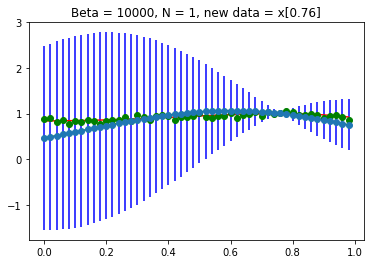

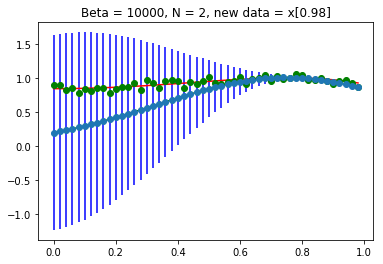

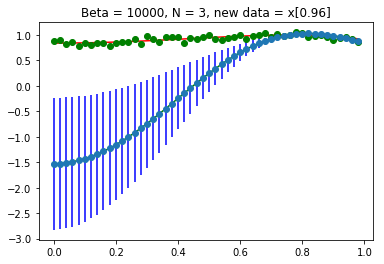

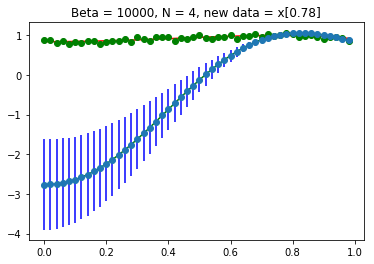

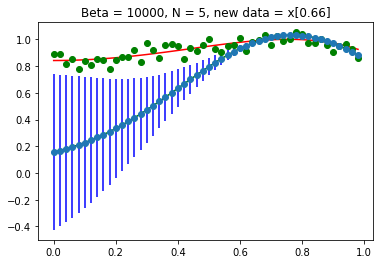

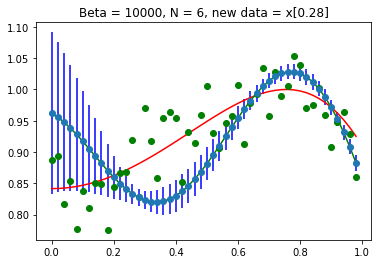

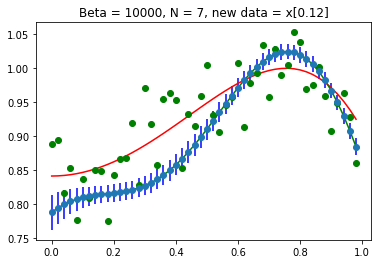

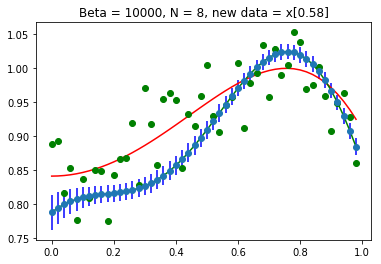

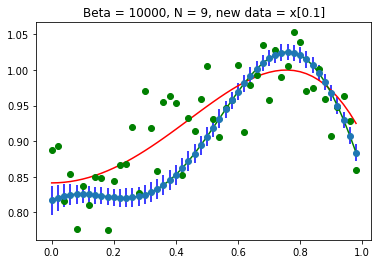

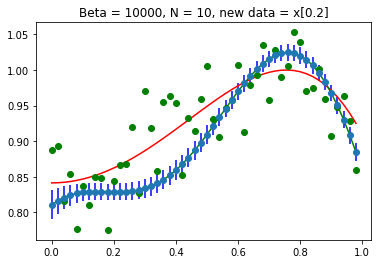

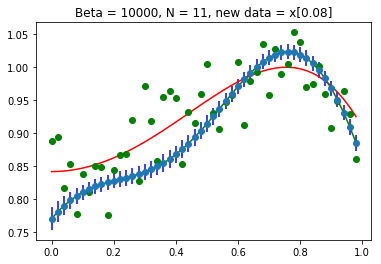

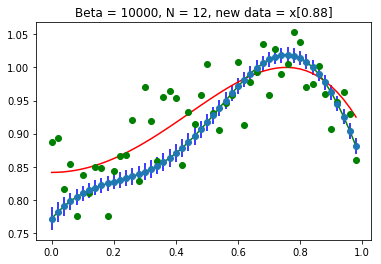

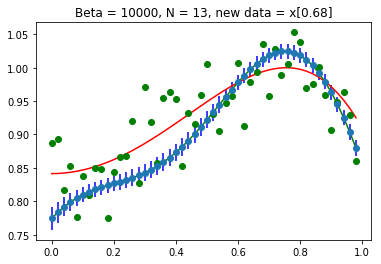

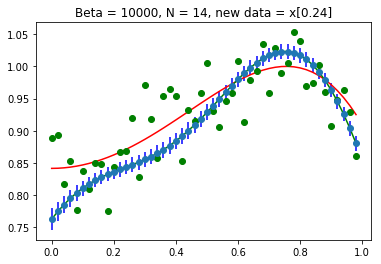

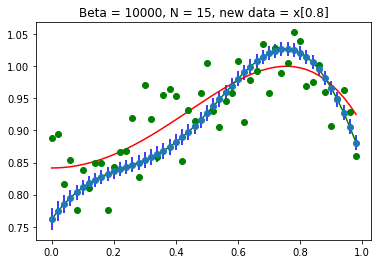

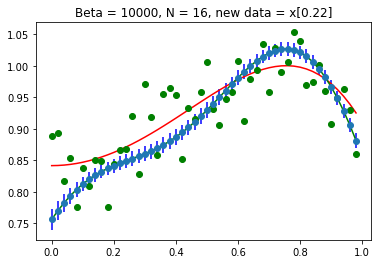

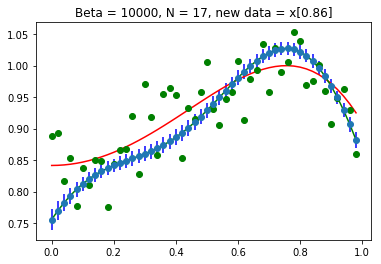

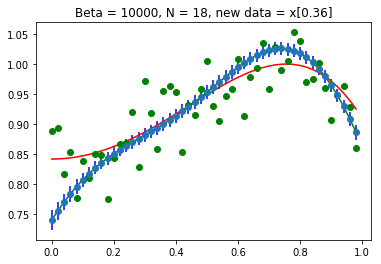

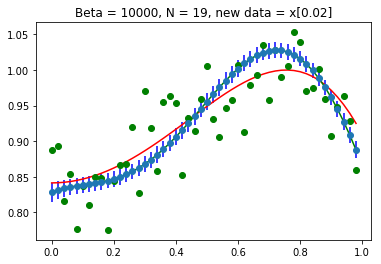

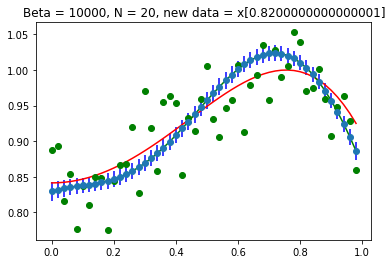

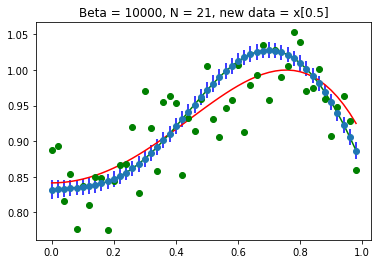

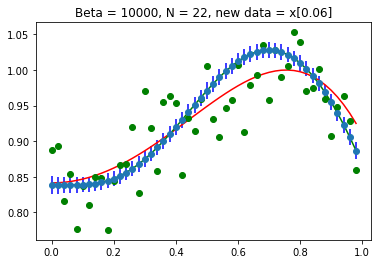

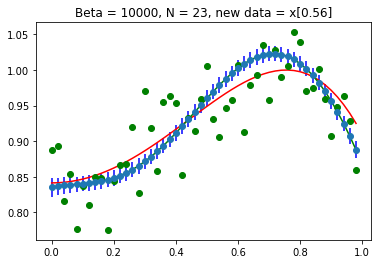

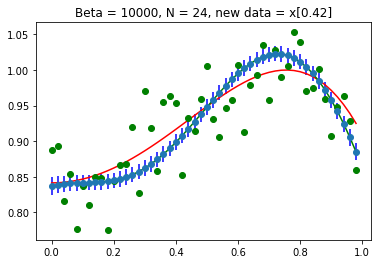

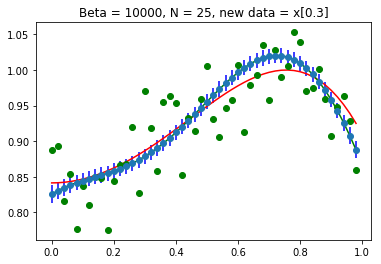

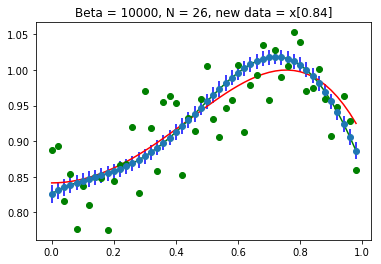

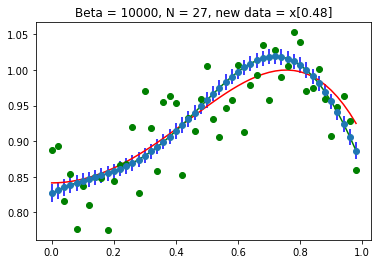

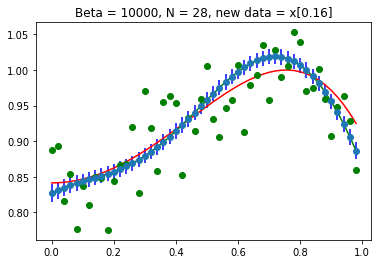

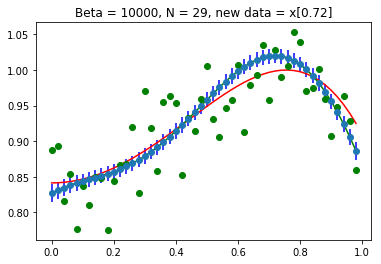

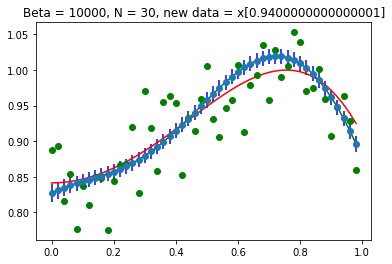

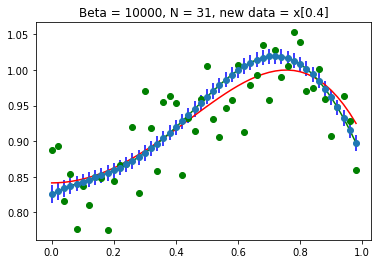

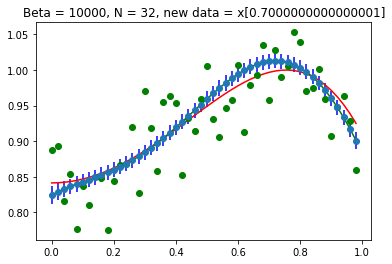

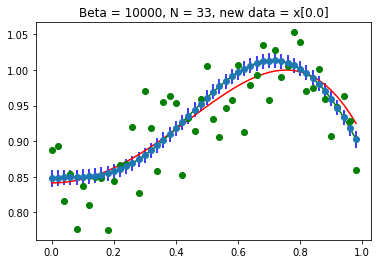

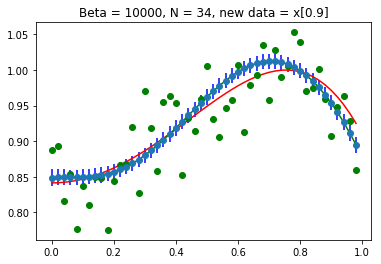

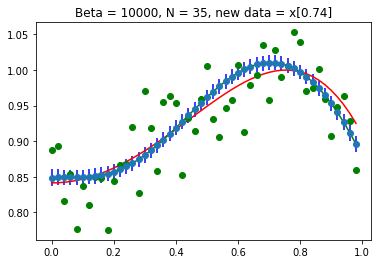

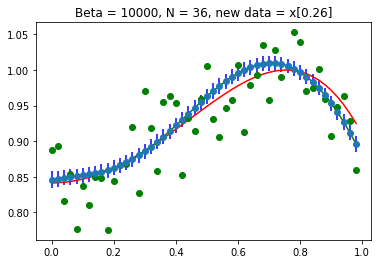

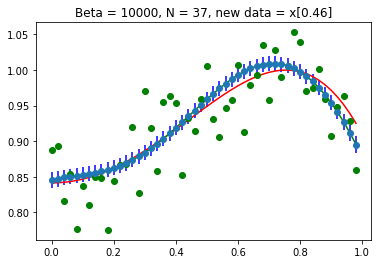

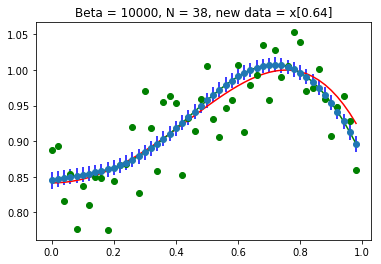

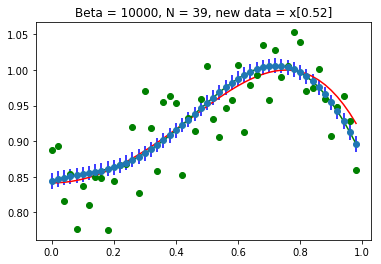

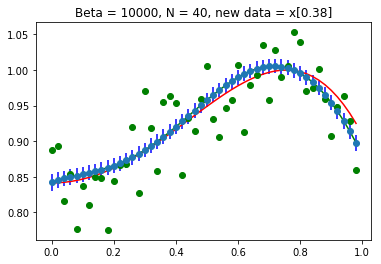

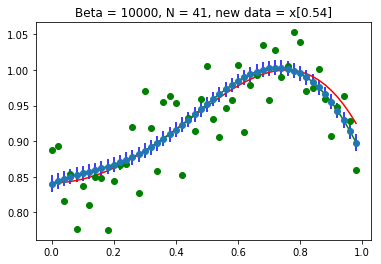

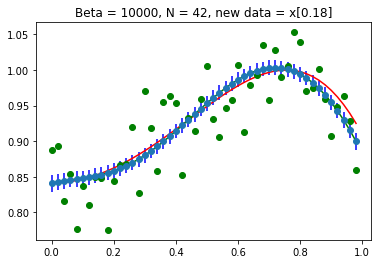

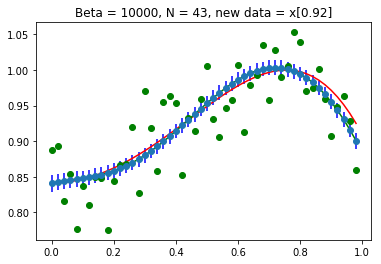

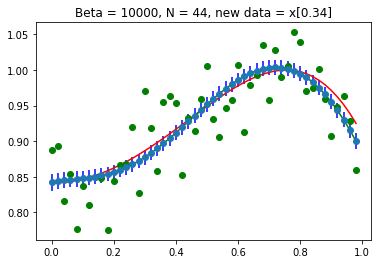

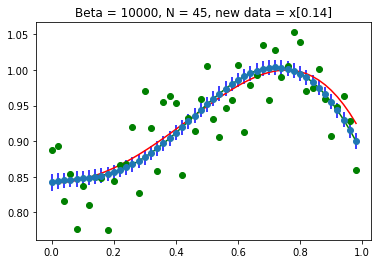

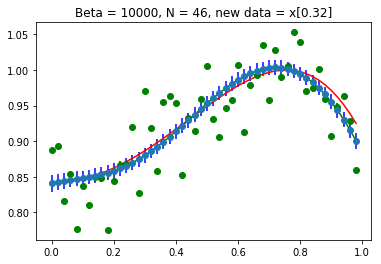

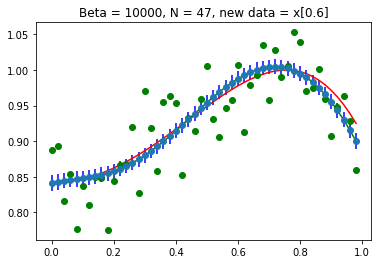

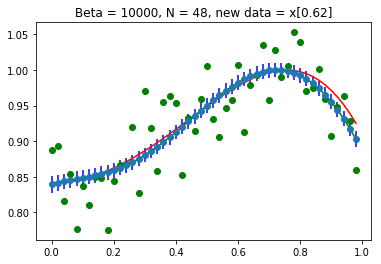

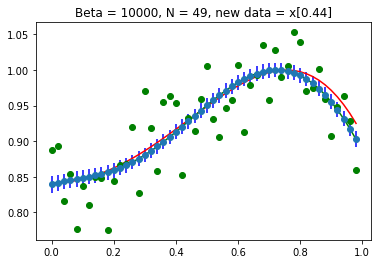

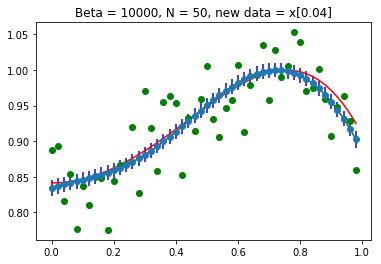

In [374]:
# Define all mus separately
mus = np.arange(x[0], x[N-1], (x[N-1]-x[0])/15)

def gaussian_m_new(x_n, m, s):
    # returns phi_m(x_n) for a particular input x_n and a particular m
    diffSq = np.power(x_n - mus[m], 2)
    return np.exp((-diffSq)/(2*s))

def PhiMat_Gaussian_new(x, M, s):
    result = np.zeros(1)
    # For each row, take gaussian_m of that row
    for i in range(M):
        newrow = gaussian_m_new(x,i,s)
        result = np.vstack([result, newrow])
    result = np.delete(result, 0, 0)
    return(np.transpose(result))

def update_predictive(m, x_, s, beta):
    index = np.arange(50)
    np.random.shuffle(index)   
    
    n = 0
    # Initialise Sn and mn
    Sn_inv = np.diag(np.full(m, round(1/alpha, 10)))
    mn = np.zeros(m)
    
    # Update Sn and Mn based on the random indexes this time, not in order
    for i in index:
        n+=1
        # Choose a random x and set it as t_star
        t_star = x_[i]
        
        # Update Sn and Mn
        Xrow = np.reshape(Xmat[i], (1,m))
        Sn_inv_new = Sn_inv + beta*(np.matmul(np.transpose(Xrow),Xrow))
        mn_new = np.dot(np.linalg.inv(Sn_inv_new), (np.dot(Sn_inv, mn) + beta*np.dot(np.transpose(Xmat[i]), t_bar[i])))
        mn = mn_new 
        Sn_inv = Sn_inv_new
        
        # Plot!
        plt.figure()
        plt.title("Beta = " + str(beta) + ", N = " + str(n)+", new data = x[" + str(t_star) + "]")
        # Actual curve plotted in red line
        plt.plot(x, sin_distribution()[1], "r")
        # Noisy values plotted in green points
        plt.plot(x, t_bar, "go")
        plt.plot(x, y_gaussian(x, 0.15, m, mn), "g")

        # Calculate m* and s* for each x_star, and plot the intervals
        for j in range(len(x_)):
            phi_x_star = PhiMat_Gaussian_new(x_[j], m, s)
            m_star = np.dot(np.reshape(mn, (1,15)), np.reshape(phi_x_star, (15,1)))[0][0]
            s_star = (1/beta + phi_x_star.dot(np.linalg.inv(Sn_inv)).dot(np.reshape(phi_x_star, (15,1) )))[0][0]
            plt.errorbar(x[j], m_star, yerr=np.sqrt(s_star), fmt = 'o',ecolor='b')

update_predictive(15, x, 0.15, 10000)

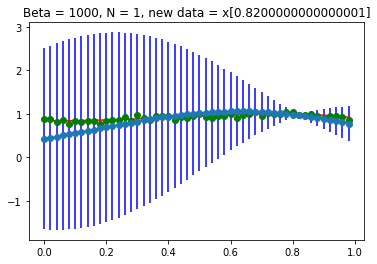

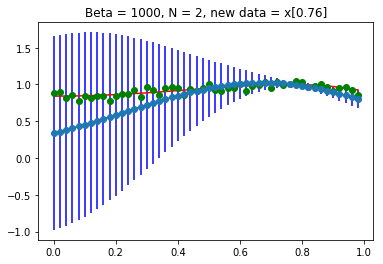

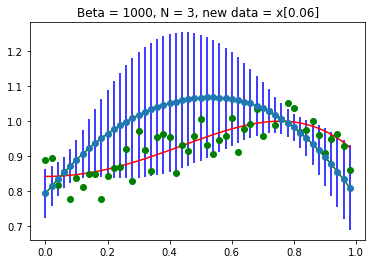

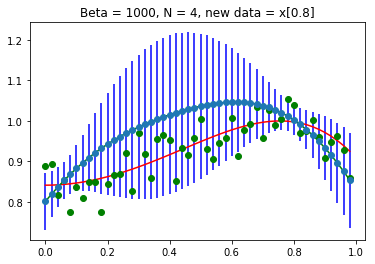

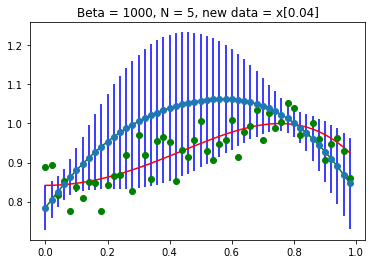

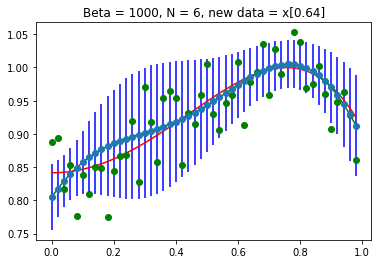

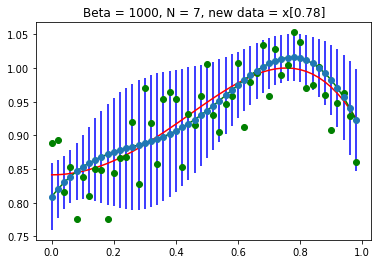

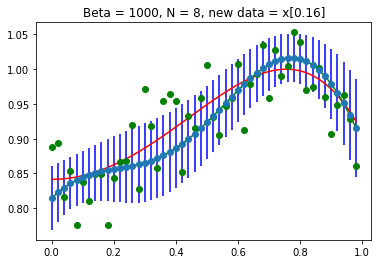

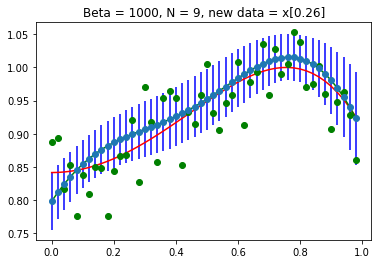

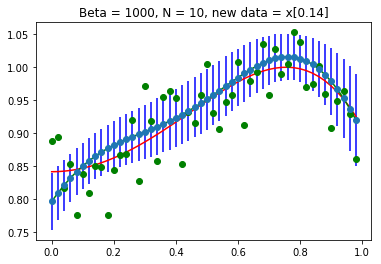

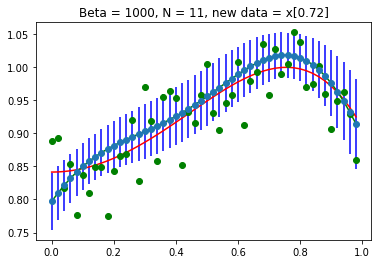

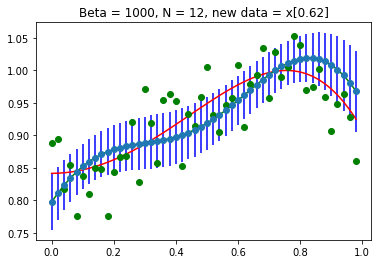

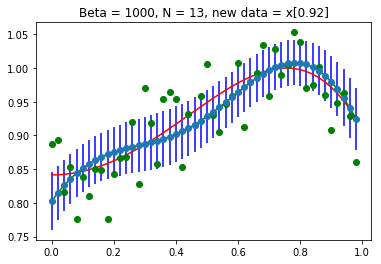

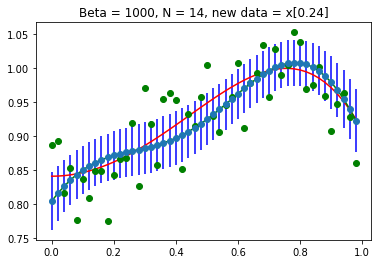

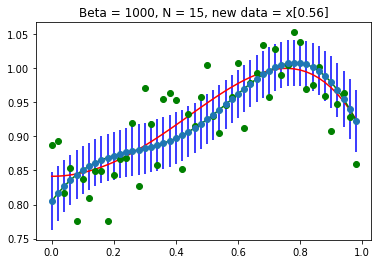

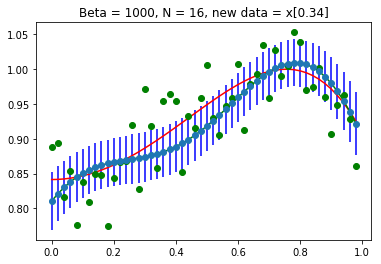

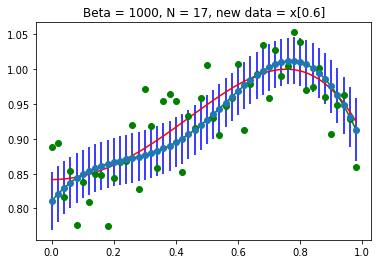

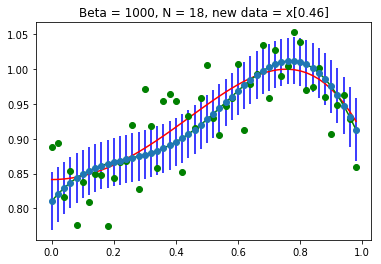

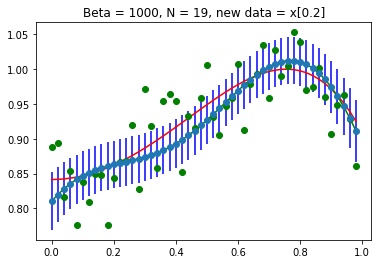

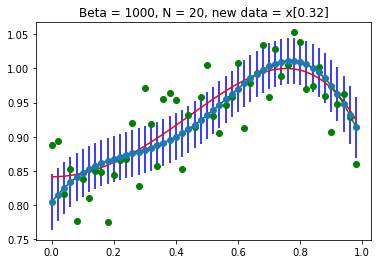

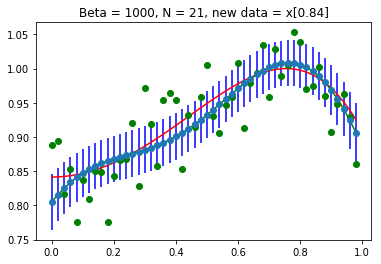

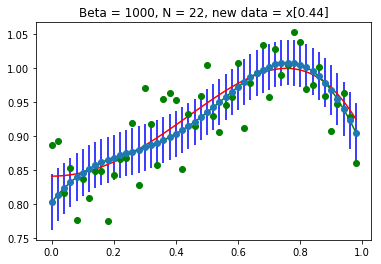

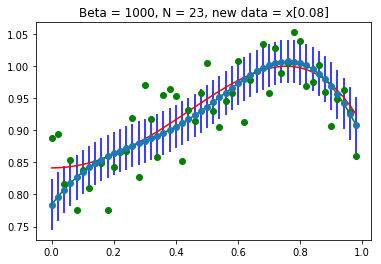

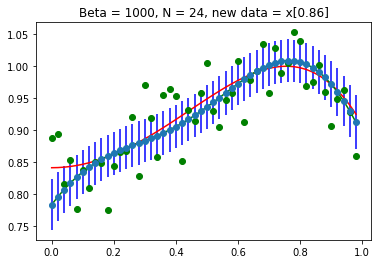

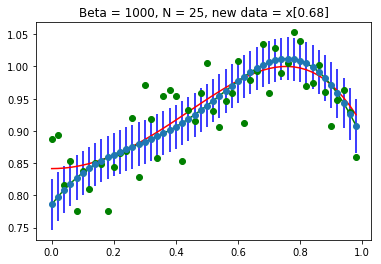

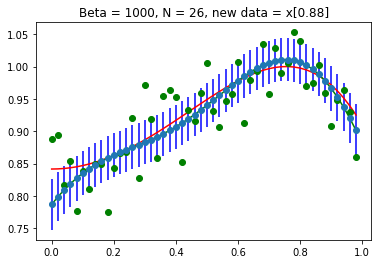

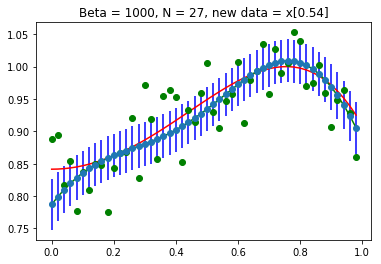

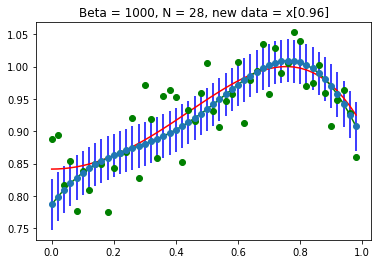

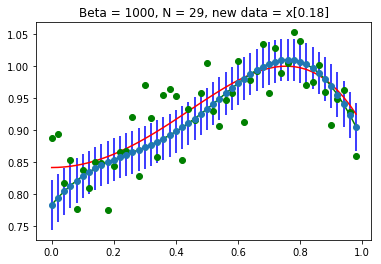

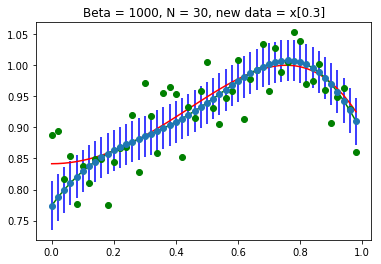

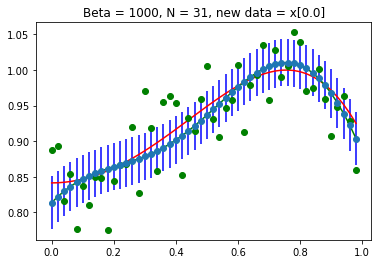

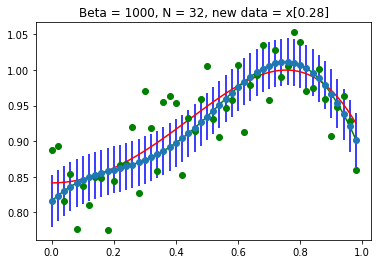

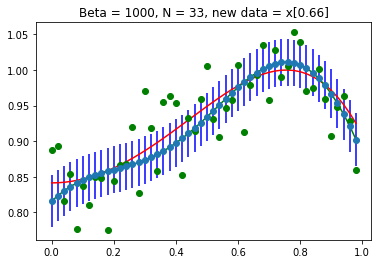

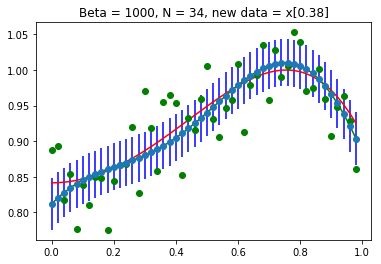

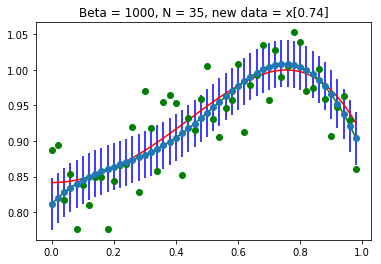

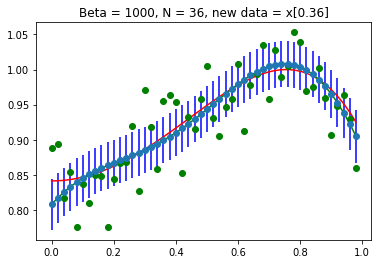

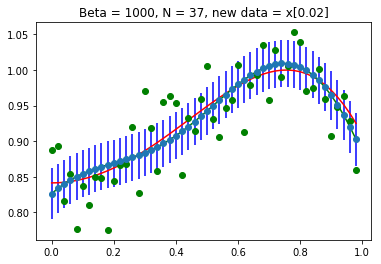

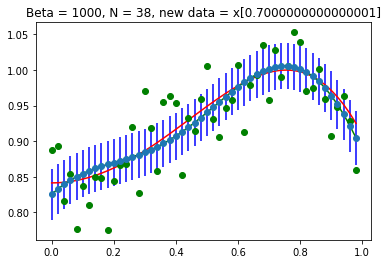

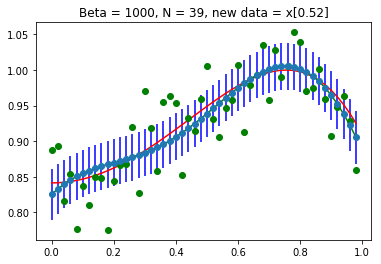

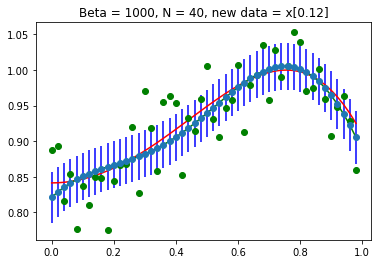

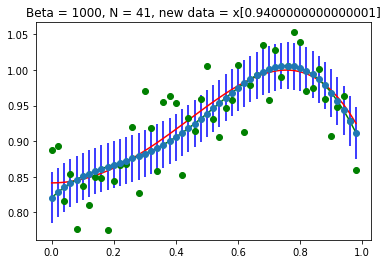

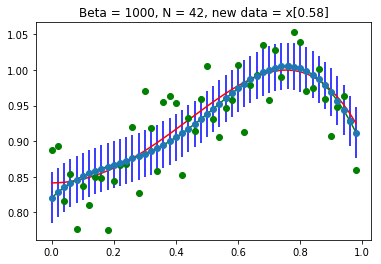

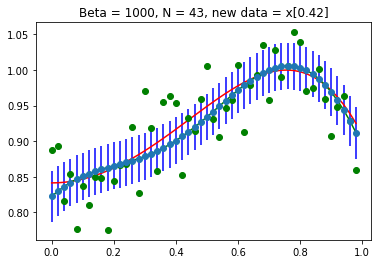

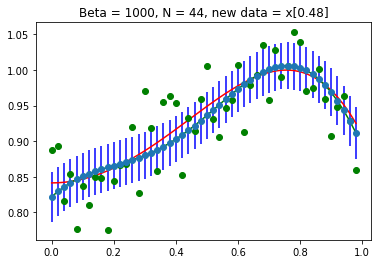

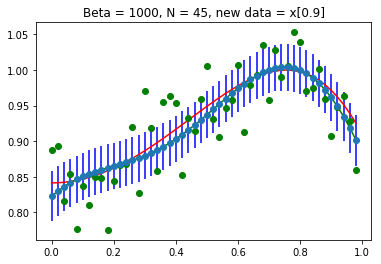

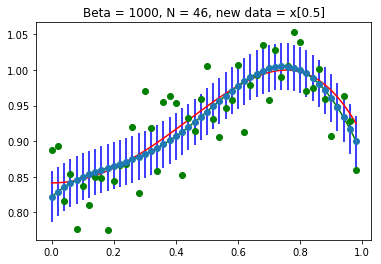

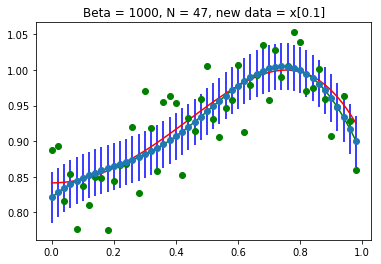

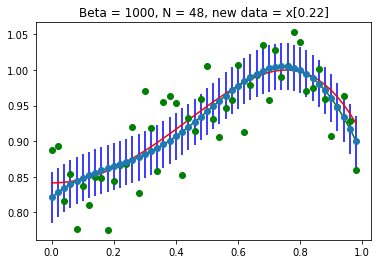

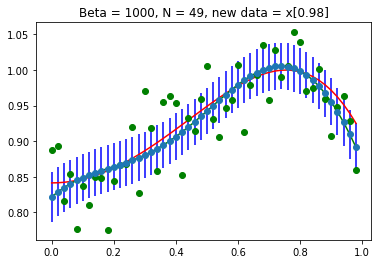

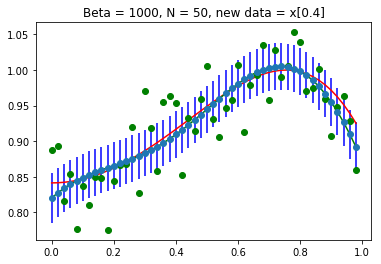

In [377]:
update_predictive(15, x, 0.15, 1000)

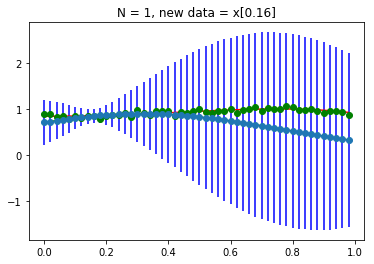

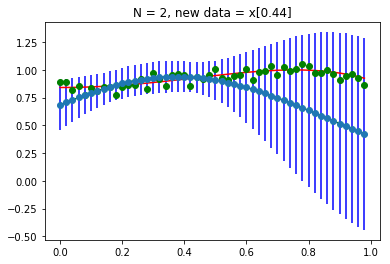

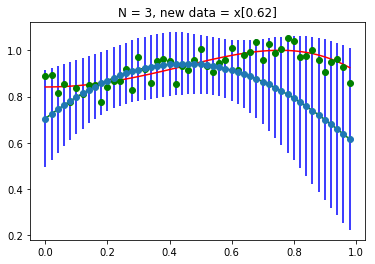

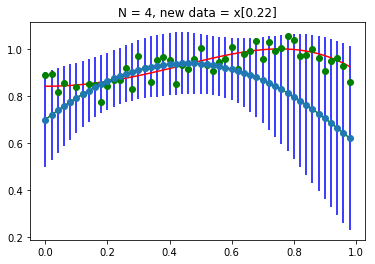

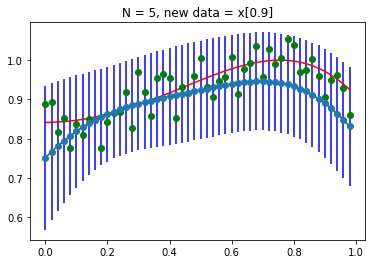

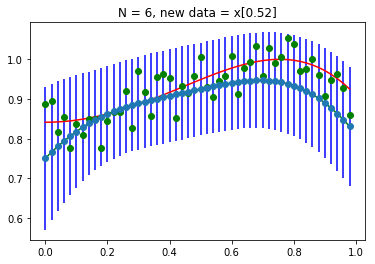

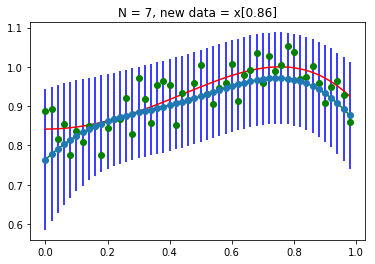

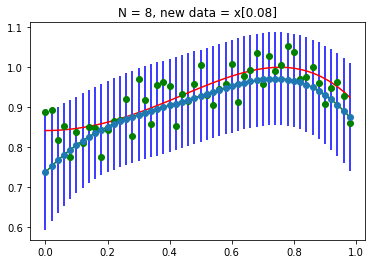

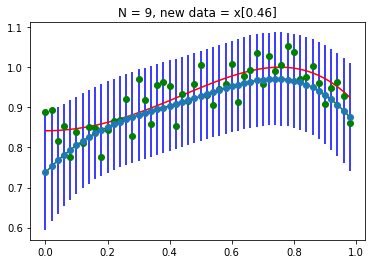

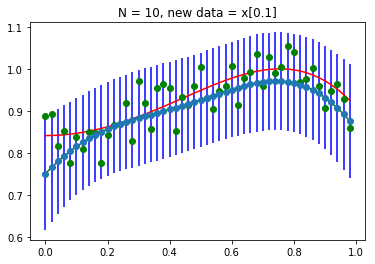

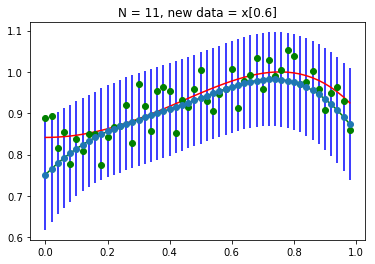

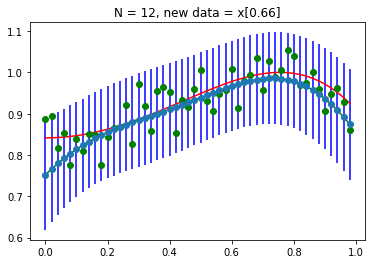

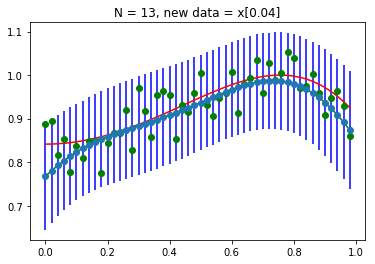

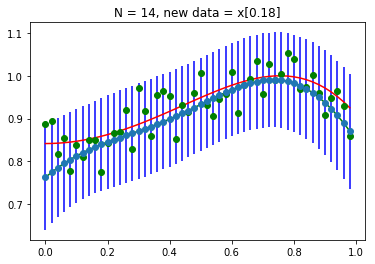

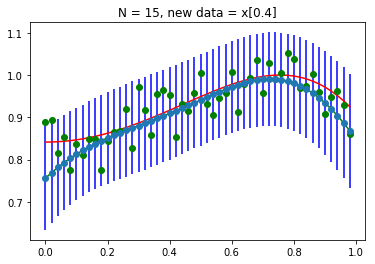

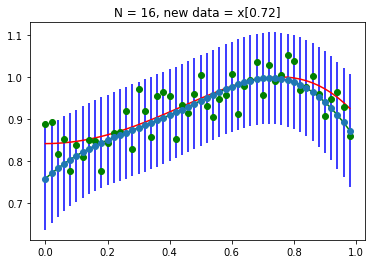

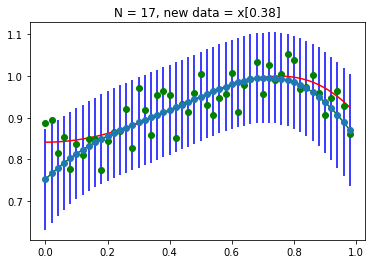

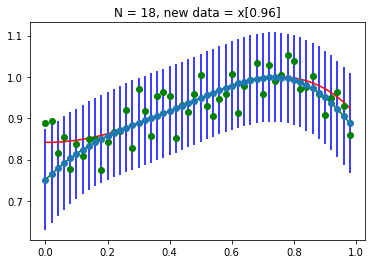

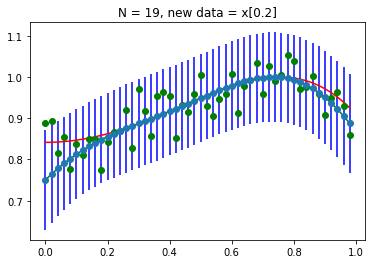

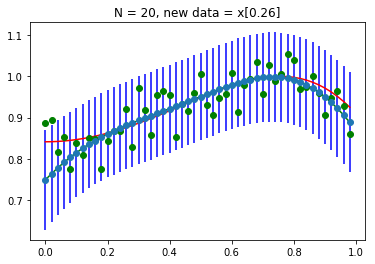

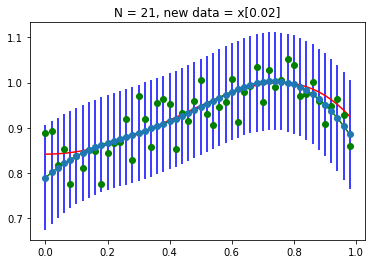

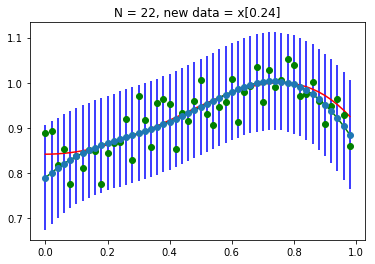

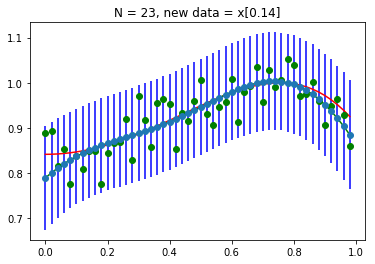

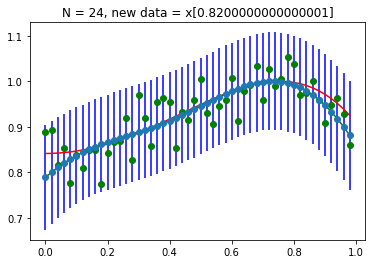

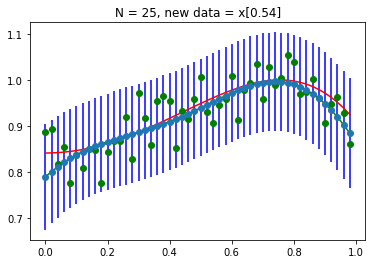

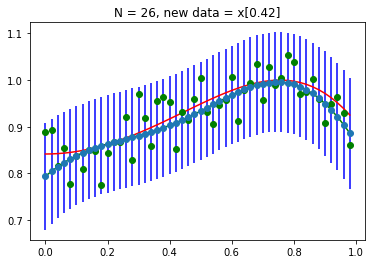

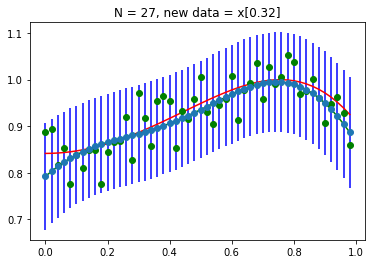

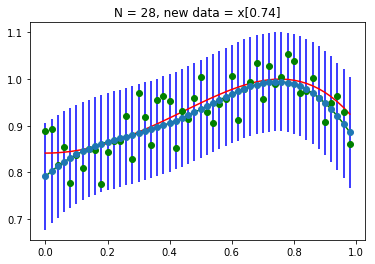

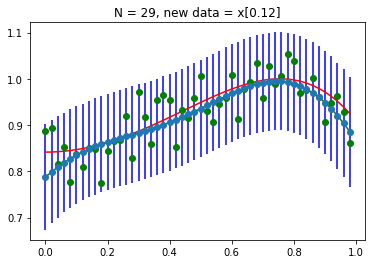

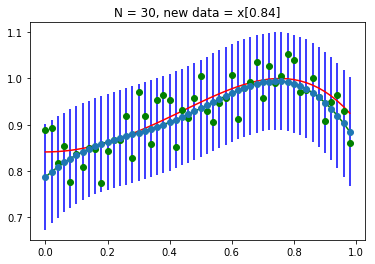

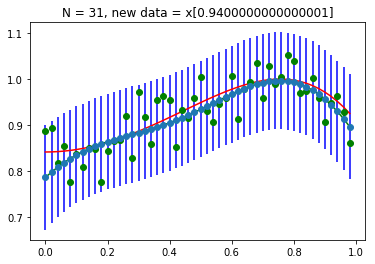

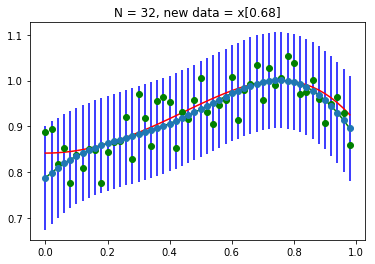

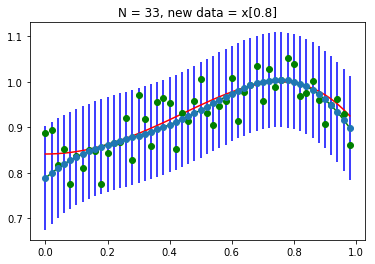

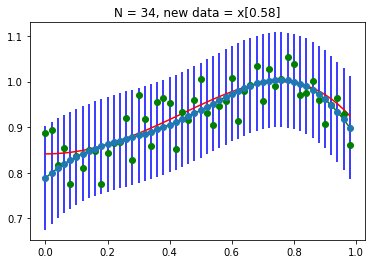

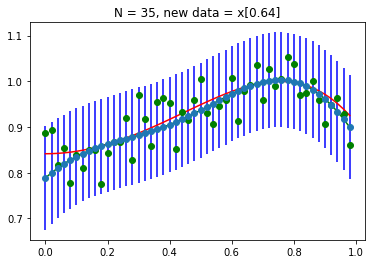

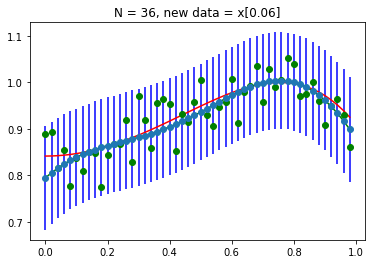

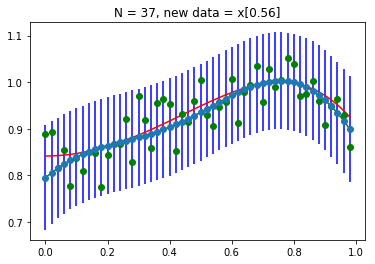

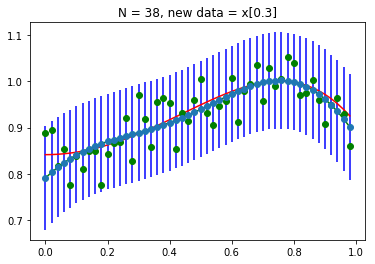

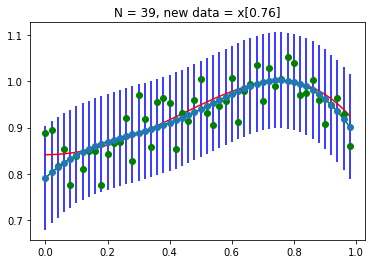

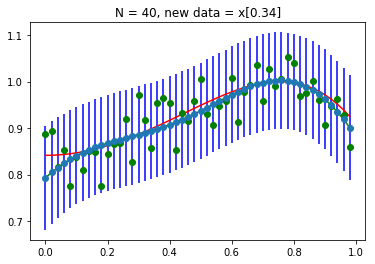

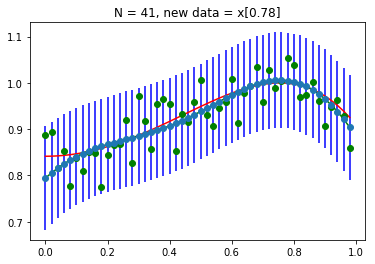

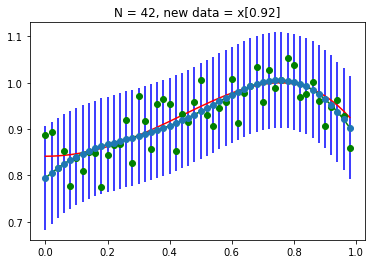

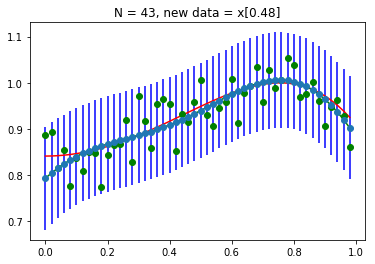

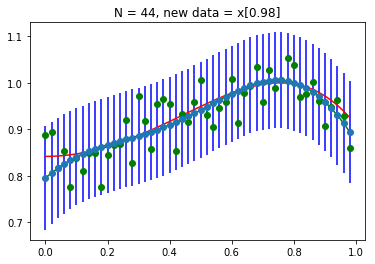

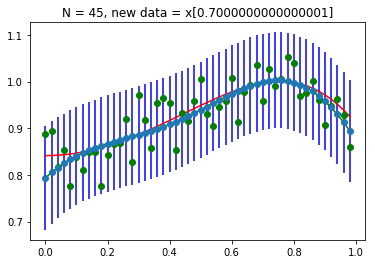

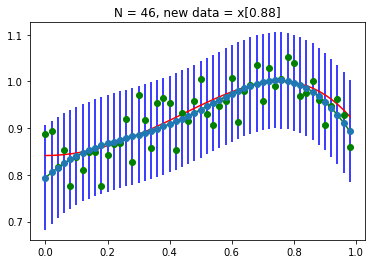

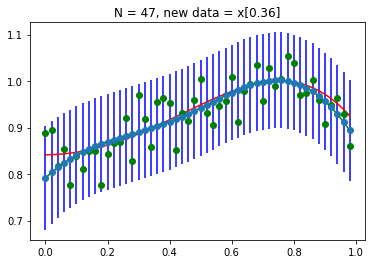

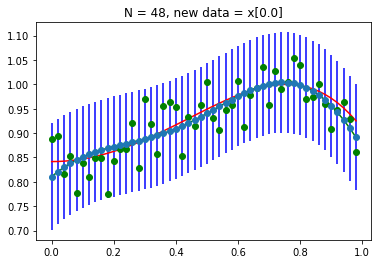

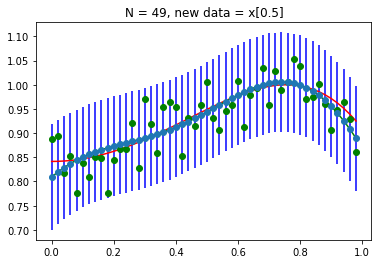

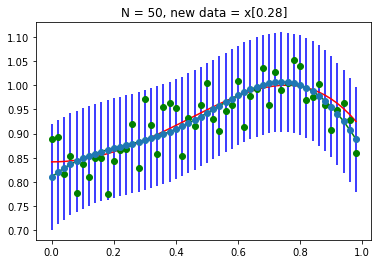

In [373]:
update_predictive(15, x, 0.15, 100)

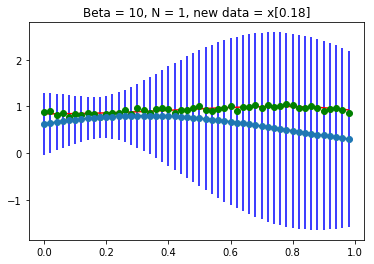

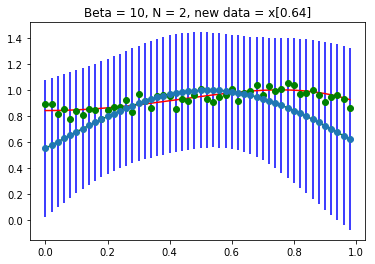

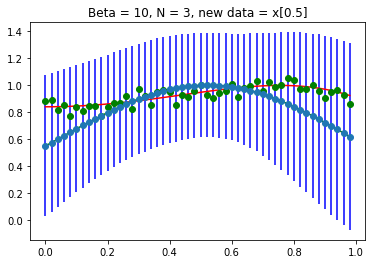

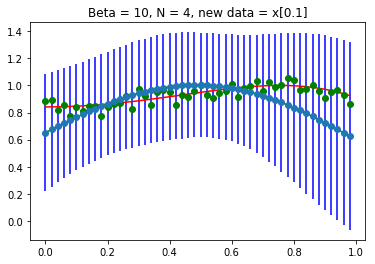

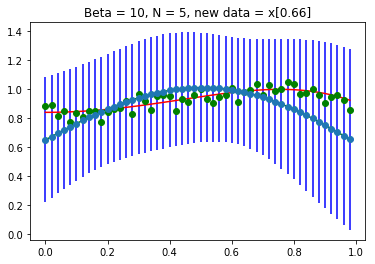

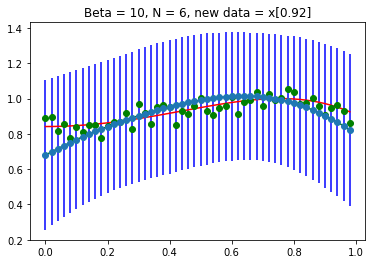

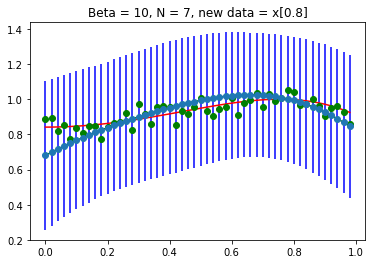

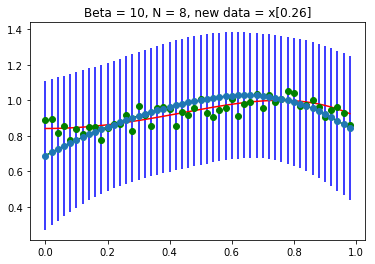

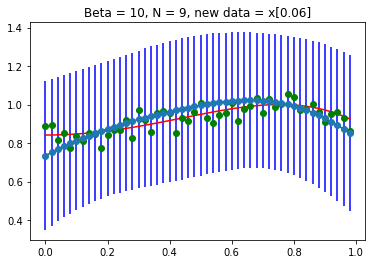

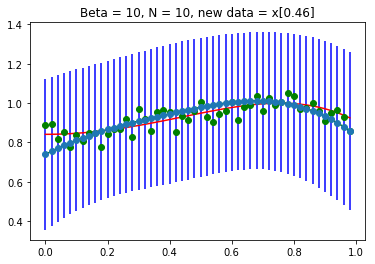

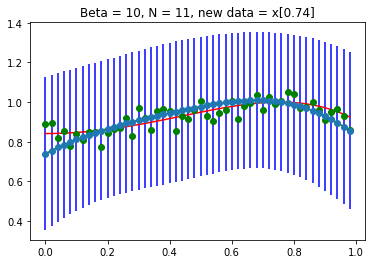

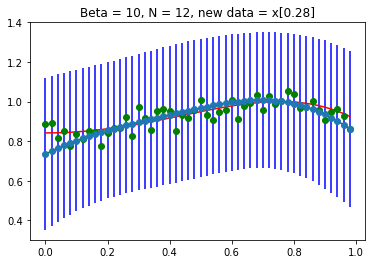

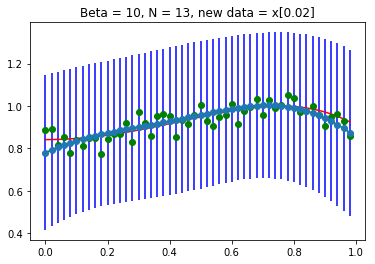

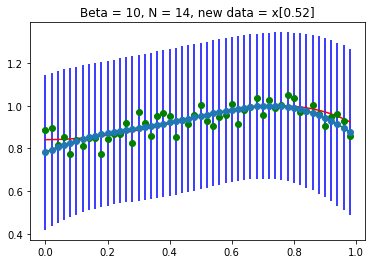

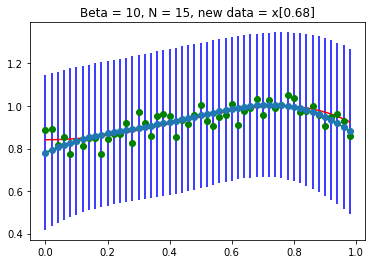

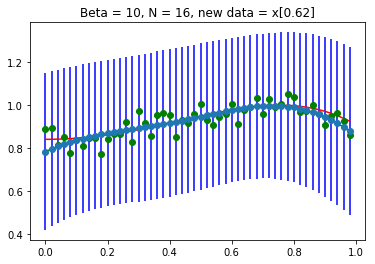

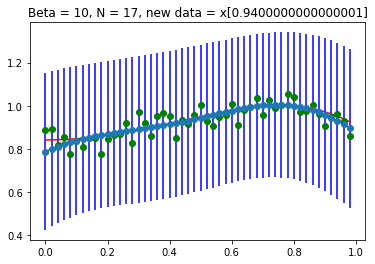

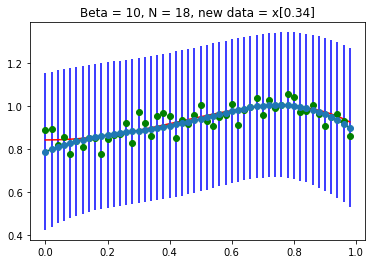

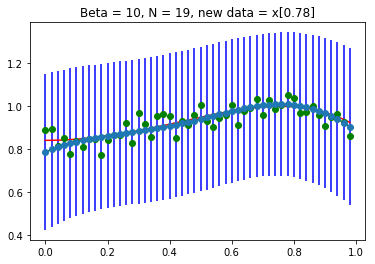

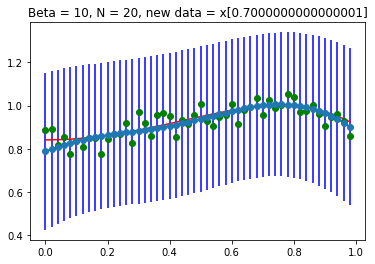

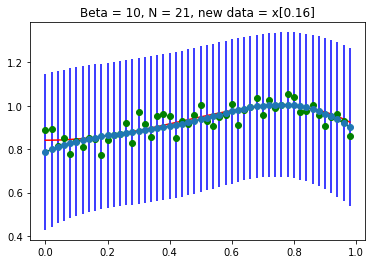

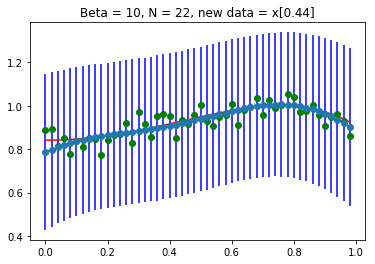

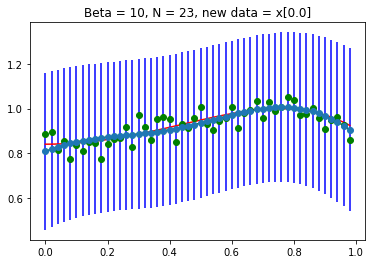

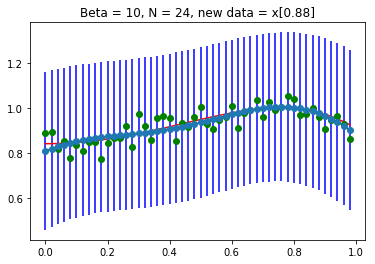

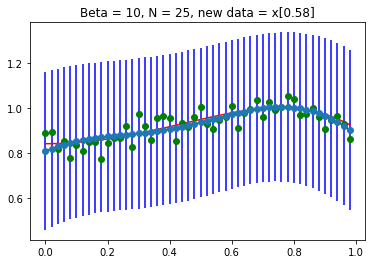

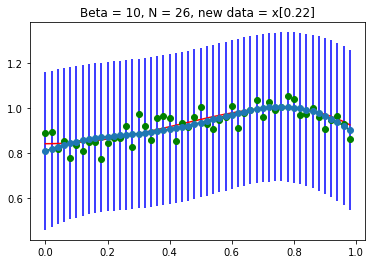

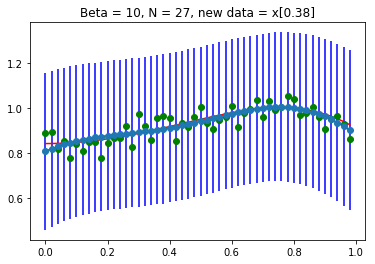

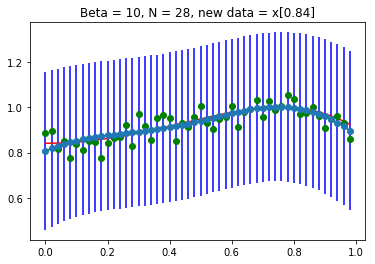

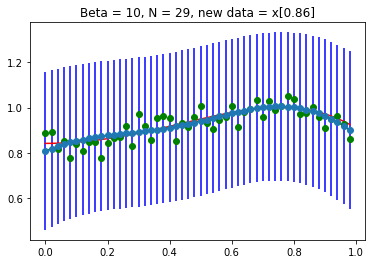

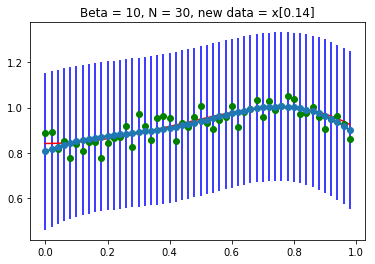

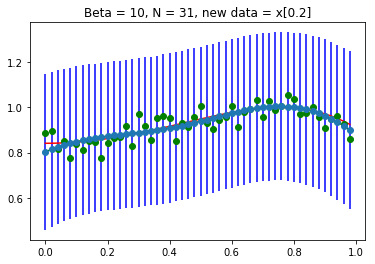

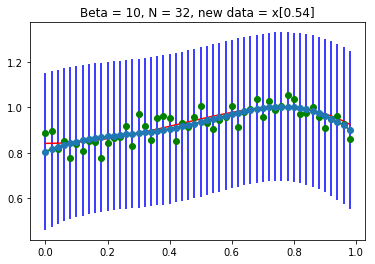

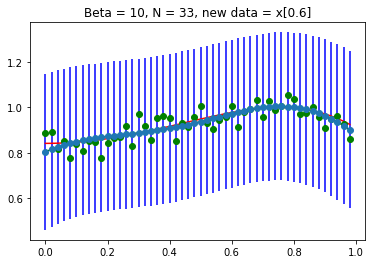

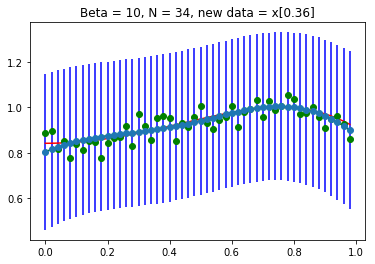

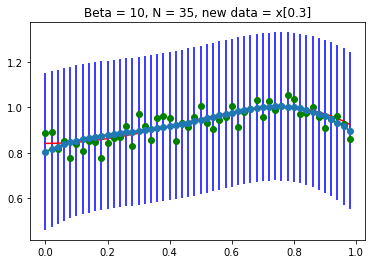

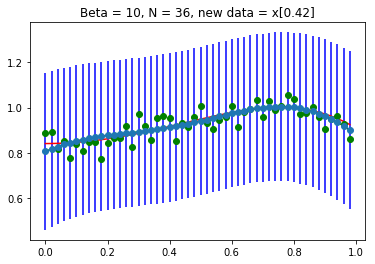

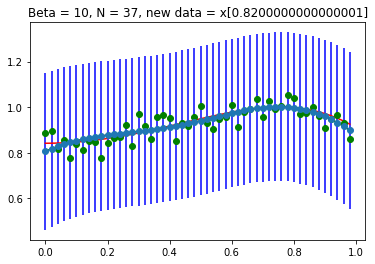

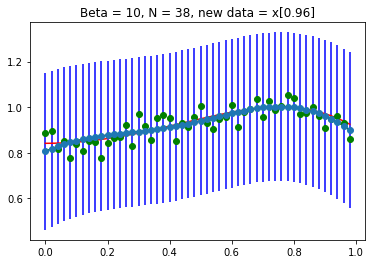

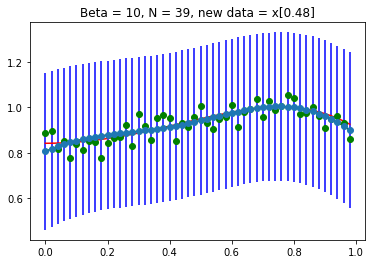

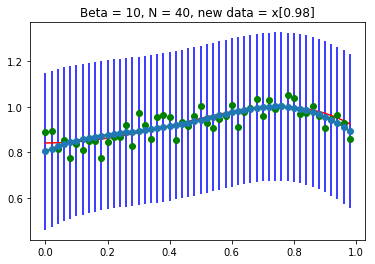

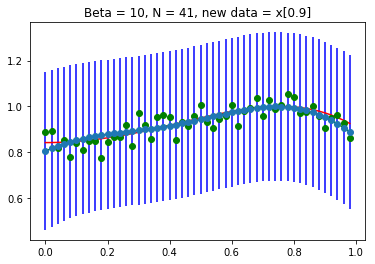

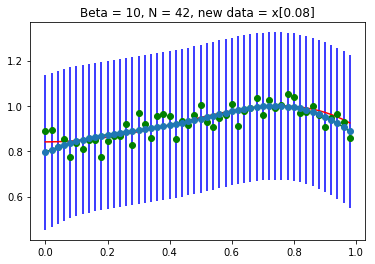

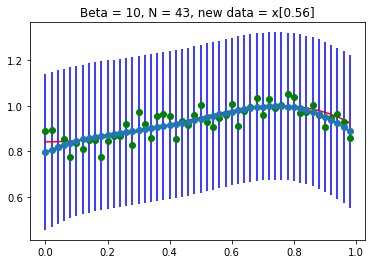

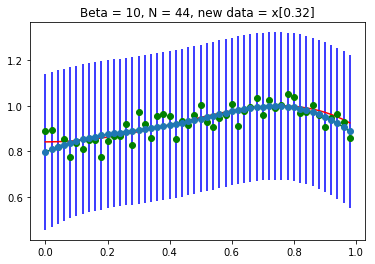

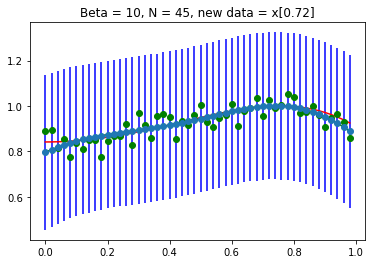

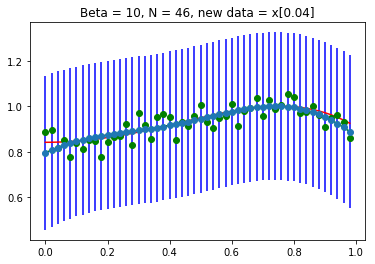

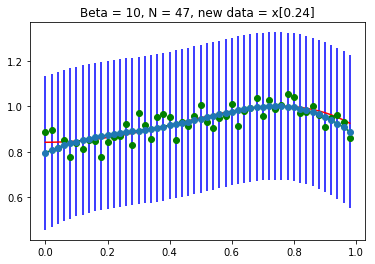

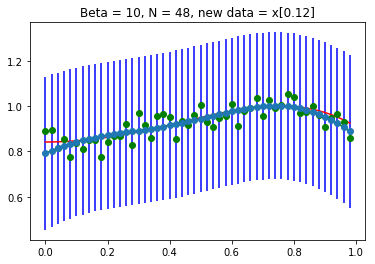

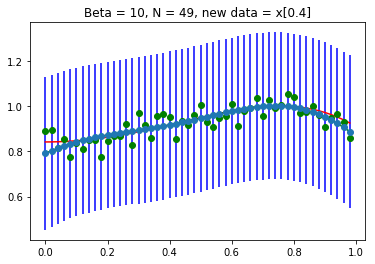

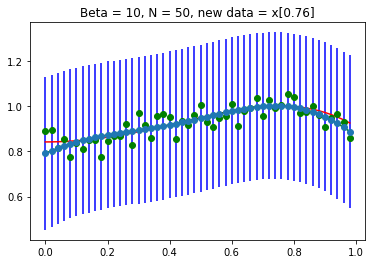

In [379]:
update_predictive(15, x, 0.15, 10)

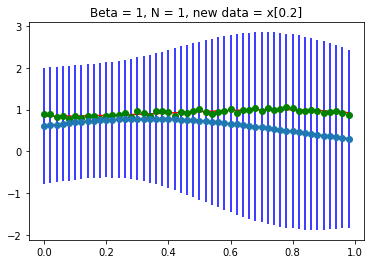

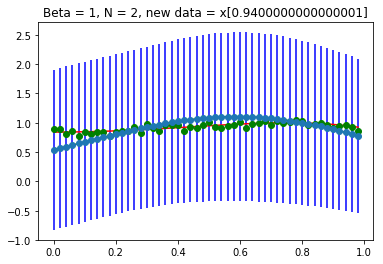

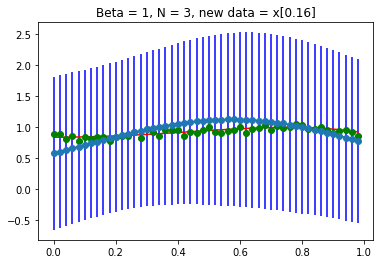

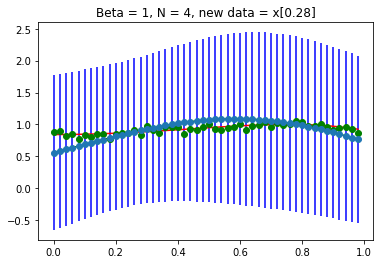

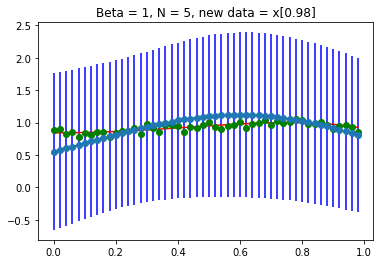

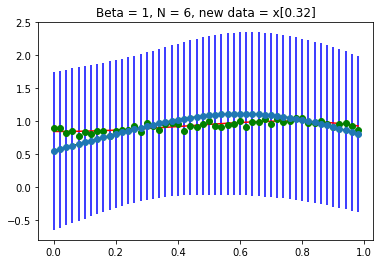

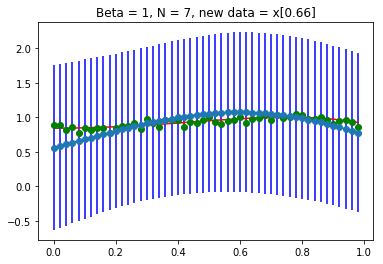

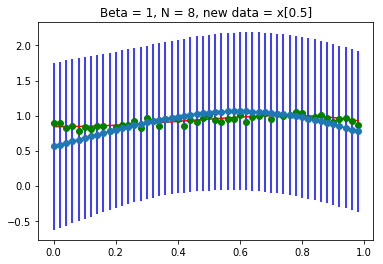

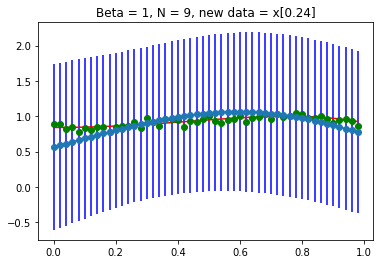

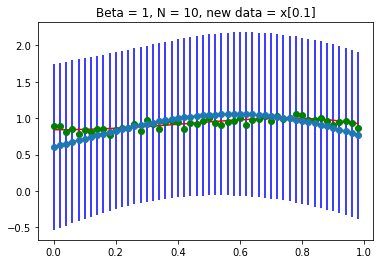

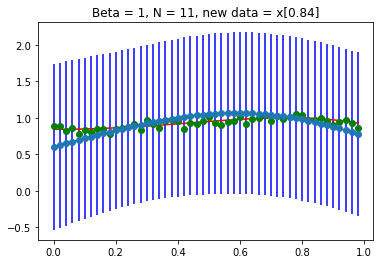

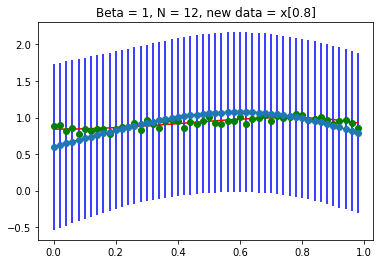

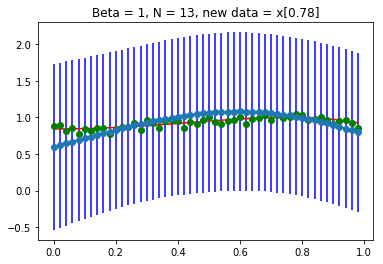

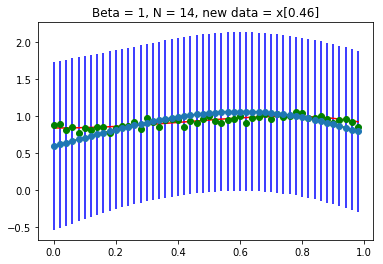

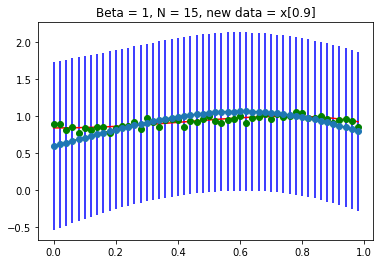

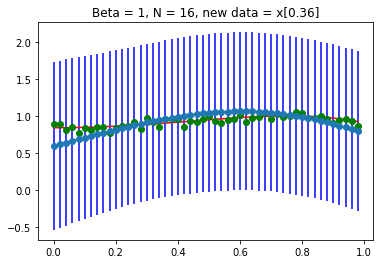

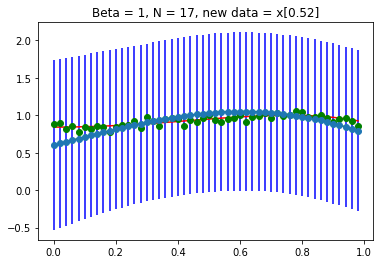

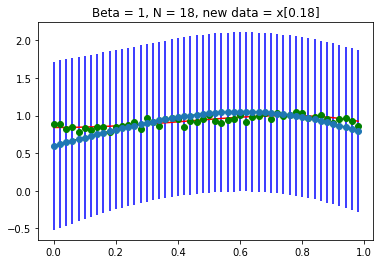

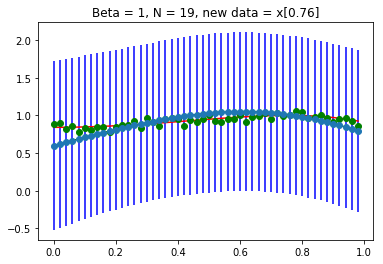

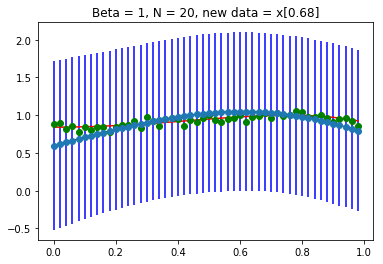

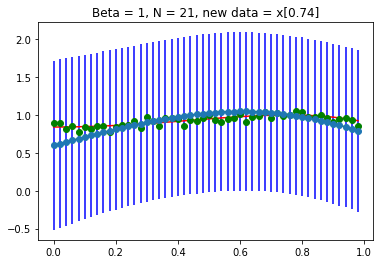

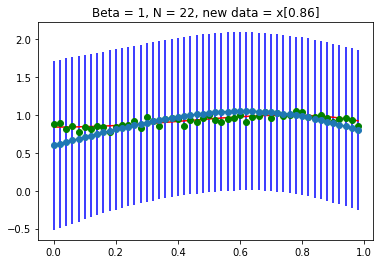

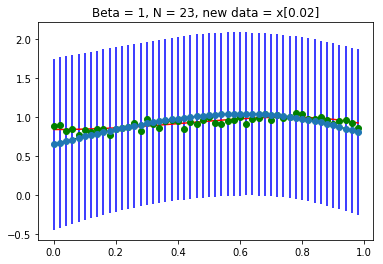

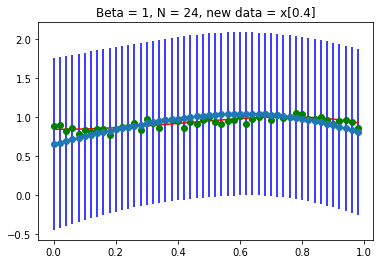

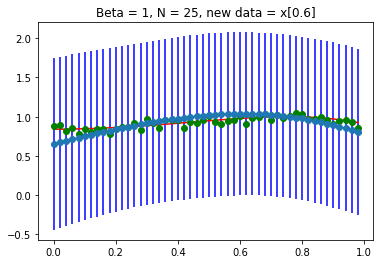

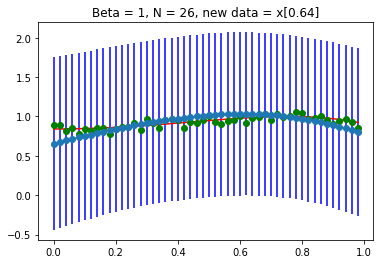

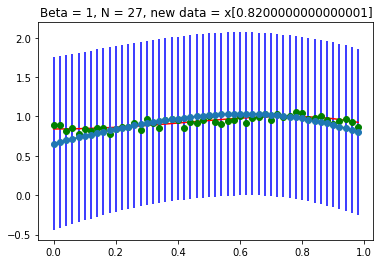

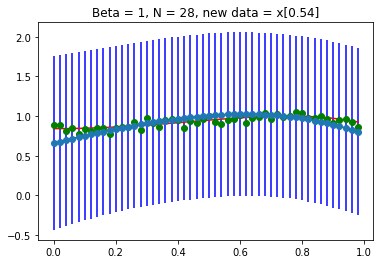

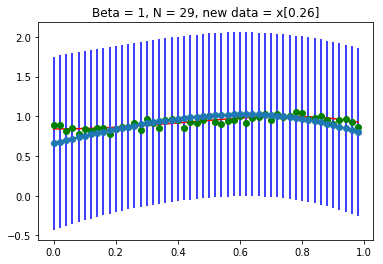

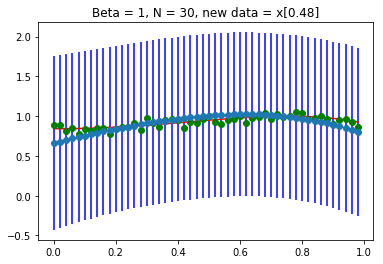

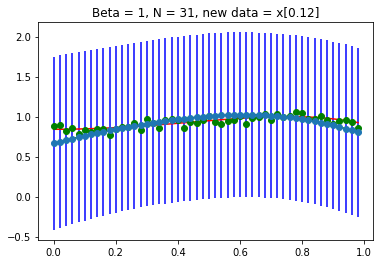

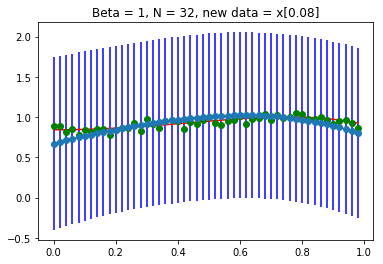

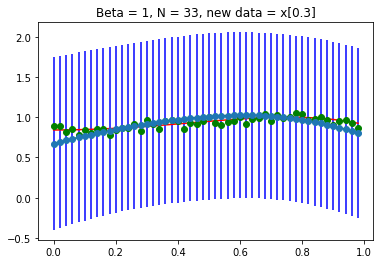

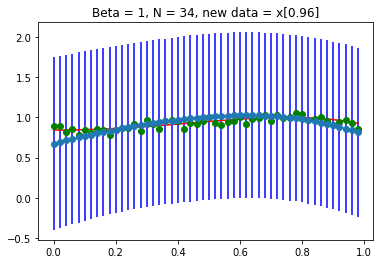

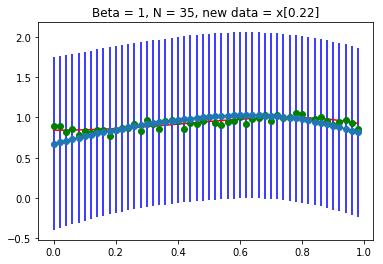

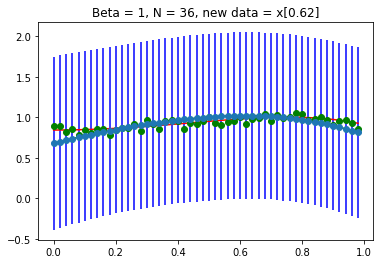

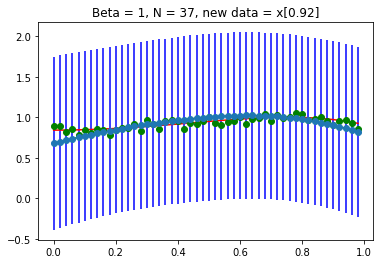

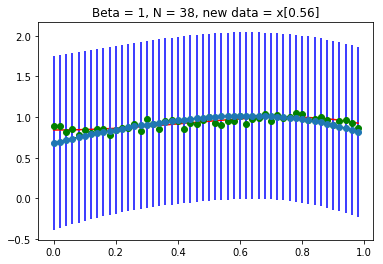

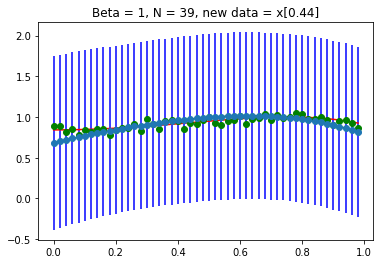

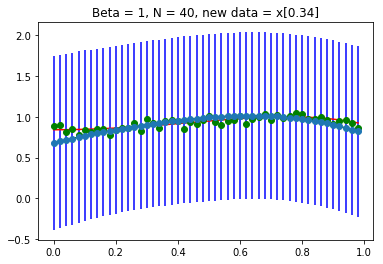

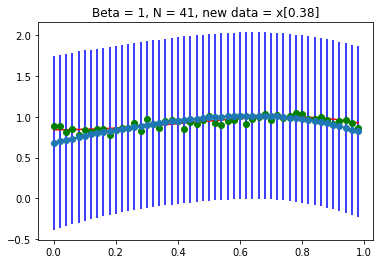

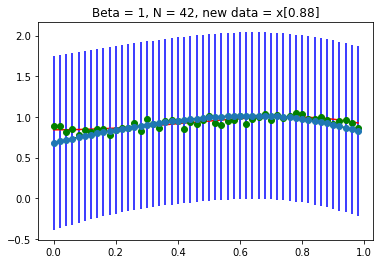

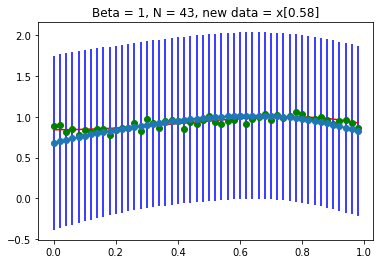

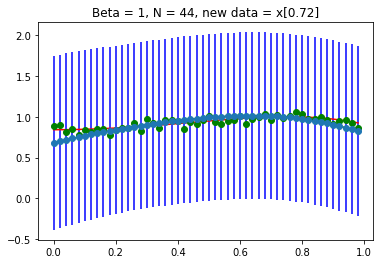

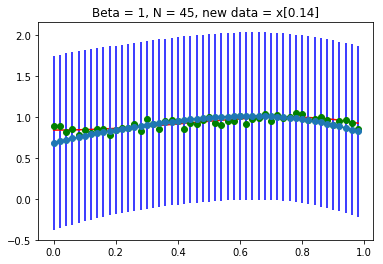

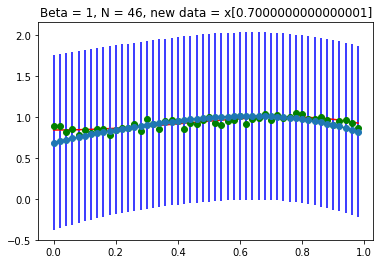

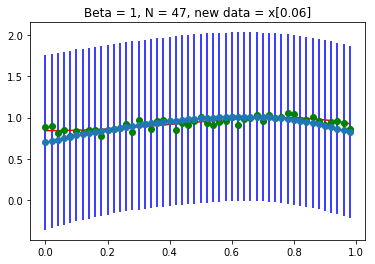

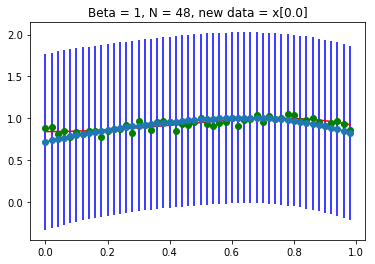

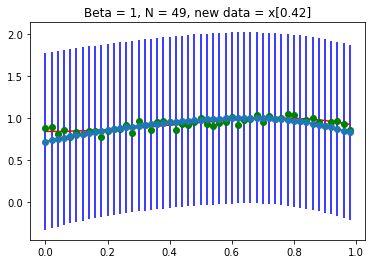

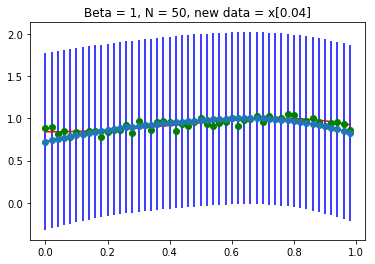

In [380]:
update_predictive(15, x, 0.15, 1)

We refer to the method of calculating the covariance matrix, $\mathbb{S}_*$ to check the meaning of $\beta$:
$$\mathbb{S}_* = \frac{1}{\beta} + \overline{\phi}^T \mathbb{S} \overline{\phi}$$
We notice that the value of $\frac{1}{\beta}$ is directly proportional to $\mathbb{S}_*$, so we can think of $\frac{1}{\beta}$ as the noise constant. However, in reality, we do not know how noisy the data is with respect to the original model. So in our predictive distribution, ideally we would to balance between two things: 

1. To have the means of the probability distribution, $\overline{m}_*$, to be as close as possible to our "original model" that we derived from the testing data, and
2. To have the uncertainty of the distribution cover all the noisy data points (such that it is tolerant to the noise of the original data).

The larger we set $\frac{1}{\beta}$, the more tolerant it is towards noisy data as the uncertainty for each data point will account for the bigger fluctuations of each data point. However, this also means that we are prone to underfitting the data since $\frac{1}{\beta}$ is our regularisation constant.

The smaller we set $\frac{1}{\beta}$, the more likely it is to overfit our data since our regularisation constant goes to $0$ (coupled with high value of $M$). Moreover, it is not very tolerant to noise since the uncertainty will not cover points that are very far away from the calculated values of $\overline{m}_*$.

A good model in this case would be the example above where $\beta = 100$, where the model is still quite close to the original model and the uncertainty covers all the noisy points.


6. Show your best prediction results for all 50 data one by one:


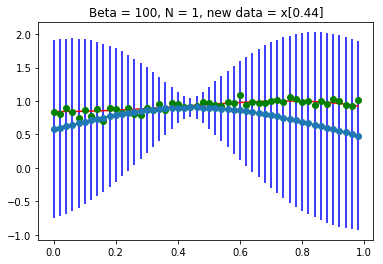

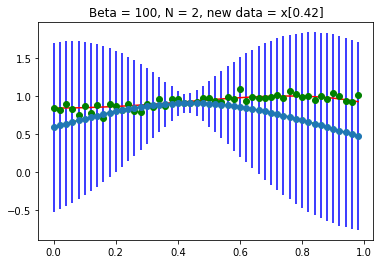

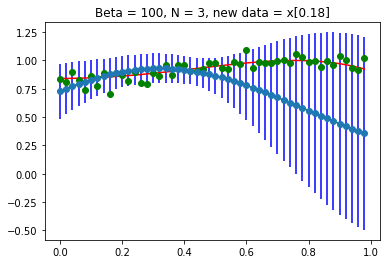

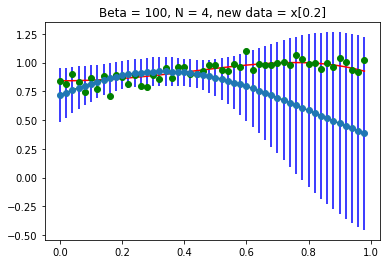

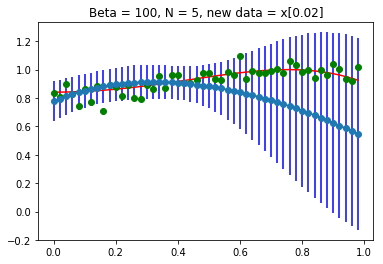

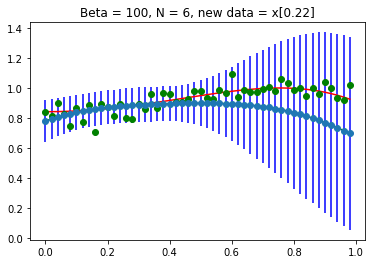

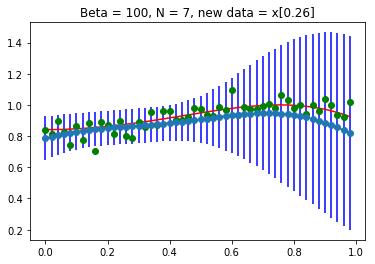

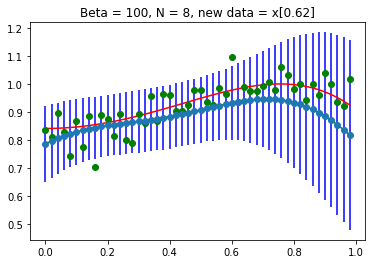

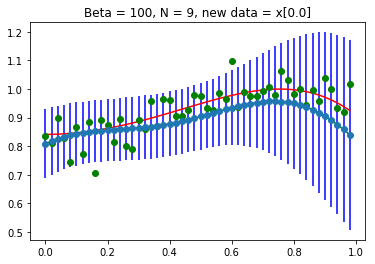

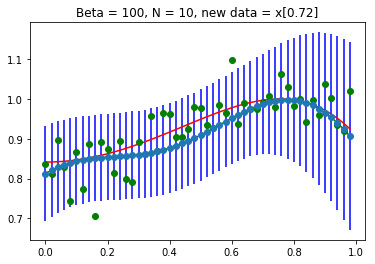

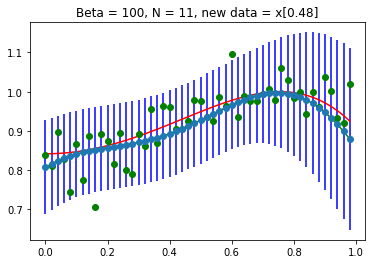

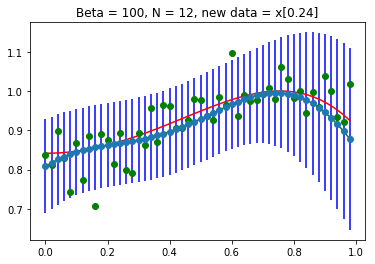

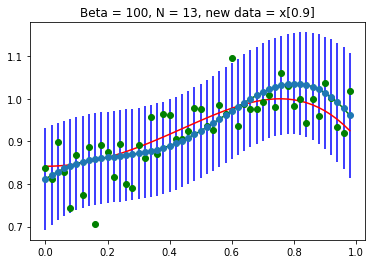

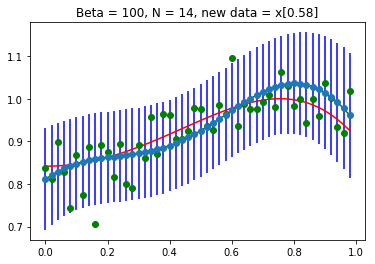

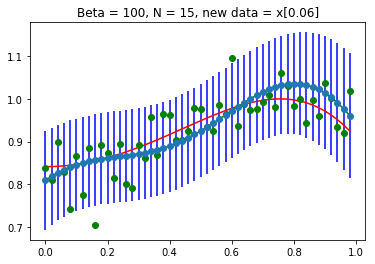

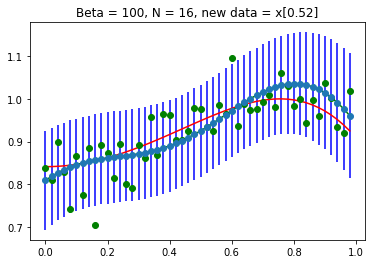

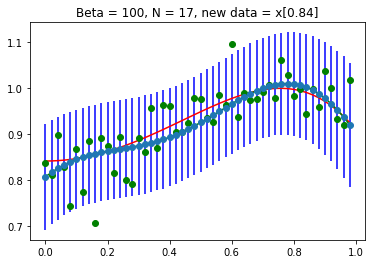

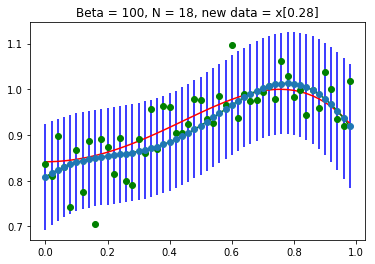

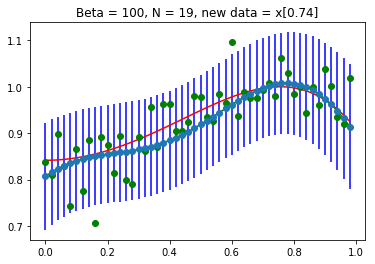

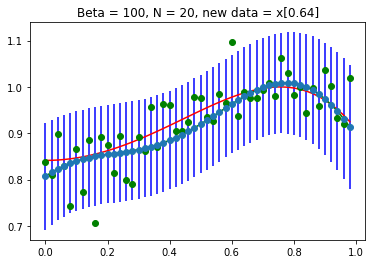

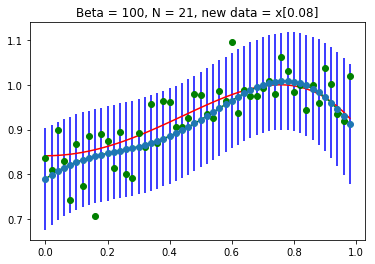

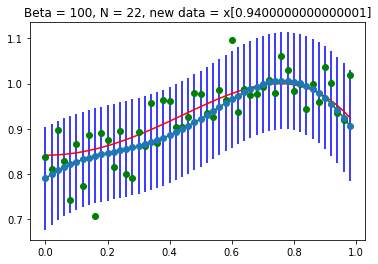

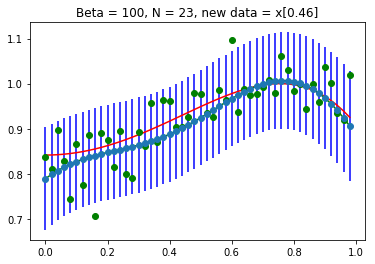

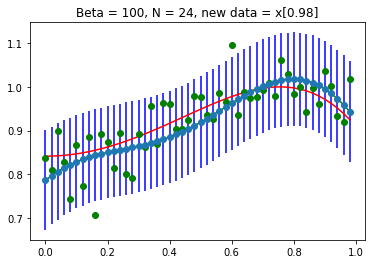

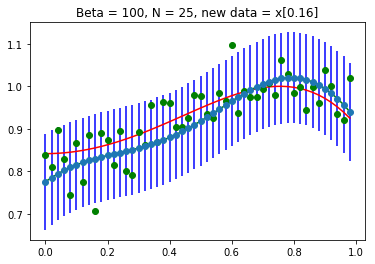

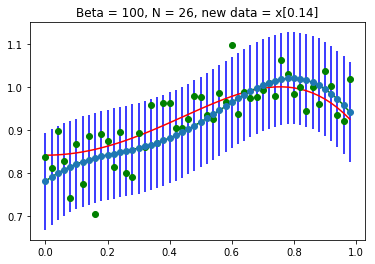

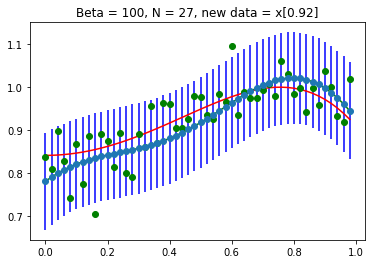

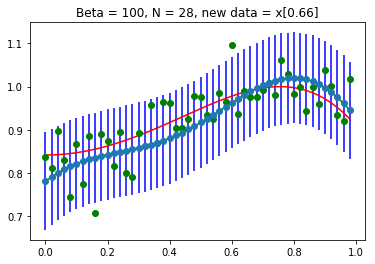

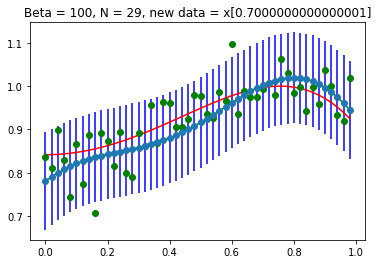

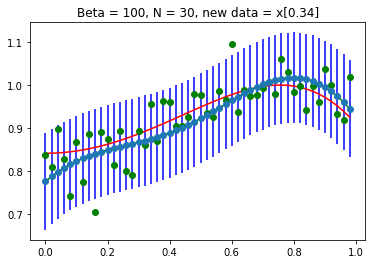

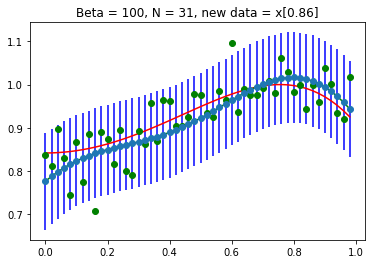

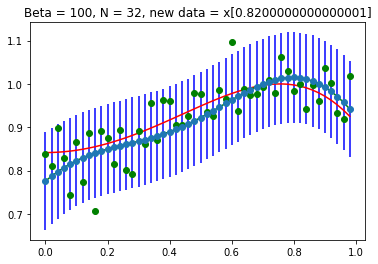

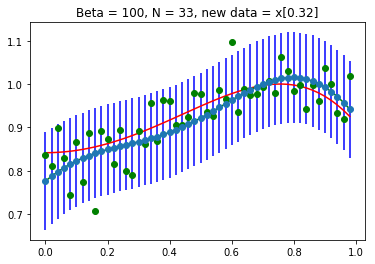

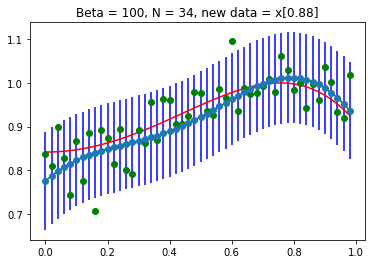

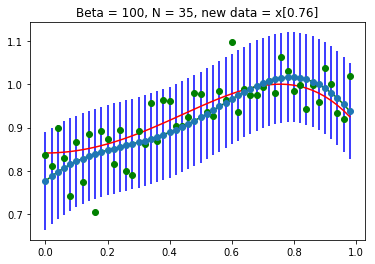

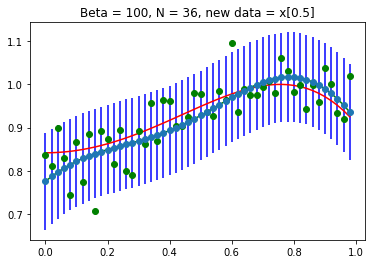

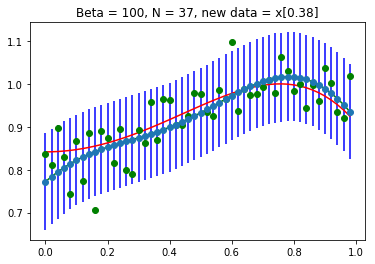

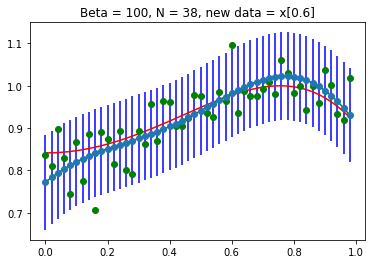

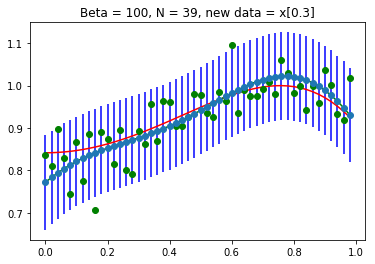

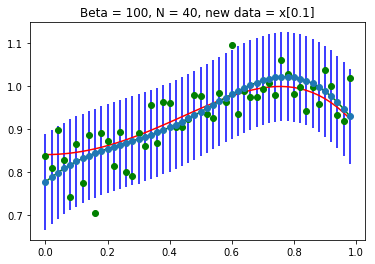

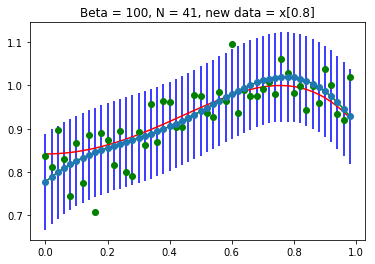

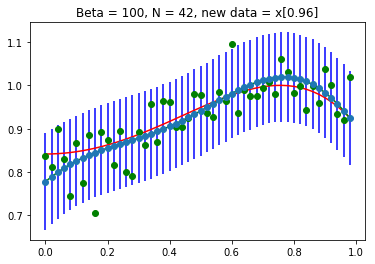

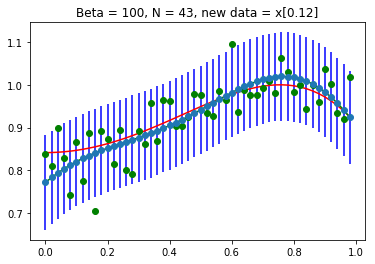

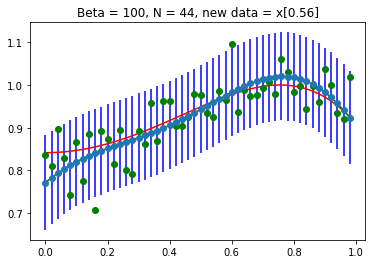

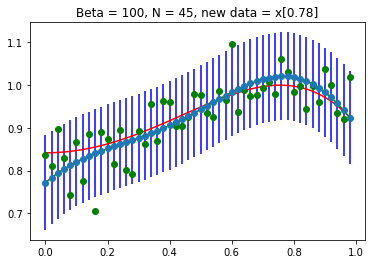

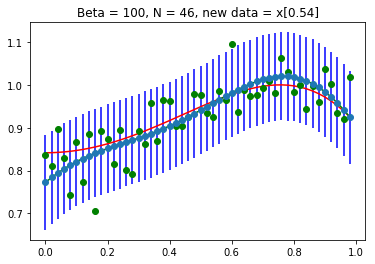

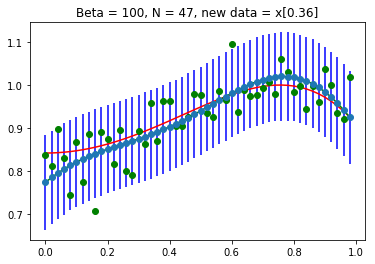

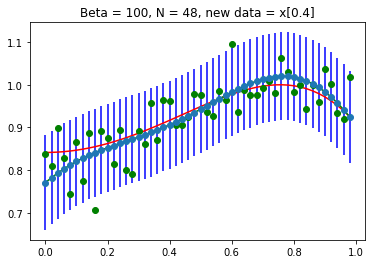

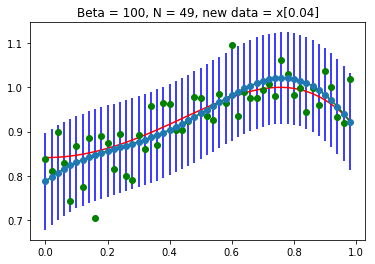

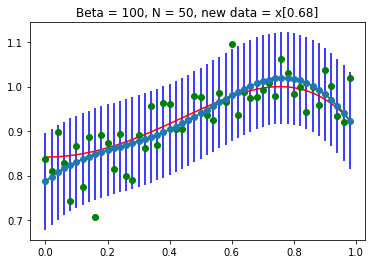

In [411]:
update_predictive(15, x, 0.15, 100)

7. Explain why the predictive distribution is better than the original form of the full Bayesian inference (part I),


In Full Bayesian inference, we only know the uncertainty of our model with respect to the training dataset. Moreover, we only know the uncertainty of the entire model (since we find $p(w|t)$, which are coefficients for the whole model) and not individual datapoints. For example, given a list of house prices, we only know the probability of the house prices following a certain trend, but not the probability of a new house being of any price. In the end, it does not help us predict results for data points outside of our training set, which is what we need in reality.

Predictive distribution not only helps us predict the probability of the new data, but also helps us to predict the probability of every possible new datapoint given the information from our training stage. For example, using the example of house prices, given a new house, we can predict the most probable price (the mean of the $p(t_*|t)$) for that house as well as how probable it is for that house to be any other price (we can read off the graph of $p(t_*|t)$ for each $x$ on the $x$ axis). 

8. Discuss the differences between $p(t_*|t)$ and $p(w|t)$.


$p(t_*|t)$ is the probability distribution of the data point $t_*$ that we want to predict. It gives us the most likely value of $t_*$, the mean, as well as the probability of $t_*$ corresponding to every other value of $x$.

$p(w|t)$ is the probability of coefficients $\overline{w}$ to be used in our model. It is a measure of how certain the model is overall based on our testing data. However, it cannot give us any information for new data outside of the training set.